In [3]:
pip install --upgrade finance-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import FinanceDataReader as fdr

In [5]:
pip install FinanceDataReader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [6]:
import FinanceDataReader as fdr

In [7]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pykrx import stock

In [10]:
df10 = stock.get_market_trading_value_by_date("20191118", "20241024", "KOSPI")
print(df10.head())

                    기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2019-11-18   63444080729  32791931670   66501141822 -162737154221   0
2019-11-19 -120251143497  36978315812   96038130792  -12765303107   0
2019-11-20  -98121543144  71681040614  360583518252 -334143015722   0
2019-11-21  264547309788  52652275527  253435776440 -570635361755   0
2019-11-22   91181180853  36601448088   58259755778 -186042384719   0


In [11]:
# 열 이름 확인
print(df10.columns)

Index(['기관합계', '기타법인', '개인', '외국인합계', '전체'], dtype='object')


In [12]:
import pandas as pd

In [13]:
# 인덱스를 날짜로 변환
df10.index = pd.to_datetime(df10.index)

# '개인' 열만 남기기
df10_individual = df10[['개인']]

# 결과 확인
print(df10_individual.head())

                      개인
날짜                      
2019-11-18   66501141822
2019-11-19   96038130792
2019-11-20  360583518252
2019-11-21  253435776440
2019-11-22   58259755778


In [14]:
df10 = df10_individual

In [15]:
import yfinance as yf
import pandas as pd

# KOSPI 지수 데이터 다운로드
kospi_data = yf.download("^KS11", start="2019-11-15", end="2024-10-24")

# 종가를 기준으로 수익률 계산
kospi_data['수익률'] = kospi_data['Close'].pct_change()

# 결과 확인
print(kospi_data[['Close', '수익률']].head())

[*********************100%***********************]  1 of 1 completed

Price             Close       수익률
Ticker            ^KS11          
Date                             
2019-11-15  2162.179932       NaN
2019-11-18  2160.689941 -0.000689
2019-11-19  2153.239990 -0.003448
2019-11-20  2125.320068 -0.012966
2019-11-21  2096.600098 -0.013513


In [16]:
# 'Close'와 '수익률' 열만 선택해서 새로운 데이터프레임 생성
kospi_data_cleaned = kospi_data[['Close', '수익률']]

In [17]:
# MultiIndex를 일반 열로 리셋
kospi_data_reset = kospi_data.reset_index()

# 필요한 열만 선택
kospi_data_cleaned = kospi_data_reset[['Date', 'Close', '수익률']]

# 열 이름 재설정
kospi_data_cleaned.columns = ['Date', 'Close', '수익률']

# 결과 확인
print(kospi_data_cleaned.head())

        Date        Close       수익률
0 2019-11-15  2162.179932       NaN
1 2019-11-18  2160.689941 -0.000689
2 2019-11-19  2153.239990 -0.003448
3 2019-11-20  2125.320068 -0.012966
4 2019-11-21  2096.600098 -0.013513


In [18]:
# 결과 확인
kospi_data = kospi_data_cleaned

In [19]:
kospi_data.head()

,Date,Close,수익률
0,2019-11-15,2162.179932,NaN
1,2019-11-18,2160.689941,-0.000689
2,2019-11-19,2153.239990,-0.003448
3,2019-11-20,2125.320068,-0.012966
4,2019-11-21,2096.600098,-0.013513


In [20]:
# 첫 번째 NaN 행 제거
kospi_data = kospi_data.dropna()

# 필요한 열만 선택
#kospi_data = kospi_data[['Close', '수익률']]

# 결과 확인
print(kospi_data.head())

        Date        Close       수익률
1 2019-11-18  2160.689941 -0.000689
2 2019-11-19  2153.239990 -0.003448
3 2019-11-20  2125.320068 -0.012966
4 2019-11-21  2096.600098 -0.013513
5 2019-11-22  2101.959961  0.002556


In [21]:
#kospi_data = kospi_data.reset_index()

In [22]:
print(kospi_data.head())

        Date        Close       수익률
1 2019-11-18  2160.689941 -0.000689
2 2019-11-19  2153.239990 -0.003448
3 2019-11-20  2125.320068 -0.012966
4 2019-11-21  2096.600098 -0.013513
5 2019-11-22  2101.959961  0.002556


In [23]:
kospi_data.rename(columns={'Date': '날짜'}, inplace=True)

C:\Users\rltks\AppData\Local\Temp\ipykernel_13392\1490393773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_data.rename(columns={'Date': '날짜'}, inplace=True)


In [24]:
kospi_data.head()

,날짜,Close,수익률
1,2019-11-18,2160.689941,-0.000689
2,2019-11-19,2153.239990,-0.003448
3,2019-11-20,2125.320068,-0.012966
4,2019-11-21,2096.600098,-0.013513
5,2019-11-22,2101.959961,0.002556


In [25]:
from pykrx import stock
from pykrx import bond

In [26]:
pip install finance-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import FinanceDataReader as fdr

In [29]:
df4 = fdr.DataReader("KOSPI","2019-11-18", "2024-10-24")
print(df4.head())

               Open     High      Low    Close     Volume  Change  UpDown  \
Date                                                                        
2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007       2   
2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034       2   
2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130       2   
2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135       2   
2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026       1   

             Comp         Amount            MarCap  
Date                                                
2019-11-18  -1.49  4450920014374  1450349808632151  
2019-11-19  -7.45  5605578491223  1446140184452898  
2019-11-20 -27.92  5583376749873  1427359928536582  
2019-11-21 -28.72  5437430115891  1407600550876970  
2019-11-22   5.36  4310267738915  1411508256467062  


In [30]:
df4 = df4.reset_index()
print(df4.head())

        Date     Open     High      Low    Close     Volume  Change  UpDown  \
0 2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007       2   
1 2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034       2   
2 2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130       2   
3 2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135       2   
4 2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026       1   

    Comp         Amount            MarCap  
0  -1.49  4450920014374  1450349808632151  
1  -7.45  5605578491223  1446140184452898  
2 -27.92  5583376749873  1427359928536582  
3 -28.72  5437430115891  1407600550876970  
4   5.36  4310267738915  1411508256467062  


In [31]:
df4.rename(columns={'Date': '날짜'}, inplace=True)

In [32]:
print(df4.head())

          날짜     Open     High      Low    Close     Volume  Change  UpDown  \
0 2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007       2   
1 2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034       2   
2 2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130       2   
3 2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135       2   
4 2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026       1   

    Comp         Amount            MarCap  
0  -1.49  4450920014374  1450349808632151  
1  -7.45  5605578491223  1446140184452898  
2 -27.92  5583376749873  1427359928536582  
3 -28.72  5437430115891  1407600550876970  
4   5.36  4310267738915  1411508256467062  


In [33]:
import pandas as pd

In [34]:
# 열 이름을 한글로 변경하기
df4.columns = [
    '날짜', 
    '시가', 
    '고가', 
    '저가', 
    '종가', 
    '거래량', 
    '변동률', 
    '상승하락', 
    'Comp', 
    '거래금액', 
    '시가총액'
]

# 결과 확인
print(df4.head())

          날짜       시가       고가       저가       종가        거래량     변동률  상승하락  \
0 2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007     2   
1 2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034     2   
2 2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130     2   
3 2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135     2   
4 2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026     1   

    Comp           거래금액              시가총액  
0  -1.49  4450920014374  1450349808632151  
1  -7.45  5605578491223  1446140184452898  
2 -27.92  5583376749873  1427359928536582  
3 -28.72  5437430115891  1407600550876970  
4   5.36  4310267738915  1411508256467062  


In [35]:
df4.corr()

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,시가총액
날짜,1.000000,0.167063,0.160647,0.171905,0.164909,-0.504163,-0.020811,0.039828,-0.020471,-0.220795,0.592006
시가,0.167063,1.000000,0.999165,0.998670,0.997599,0.304252,-0.023158,0.029782,-0.019419,0.502893,0.879850
고가,0.160647,0.999165,1.000000,0.998580,0.998749,0.311056,-0.003002,0.015798,0.001862,0.514192,0.877474
저가,0.171905,0.998670,0.998580,1.000000,0.999126,0.297565,0.008751,0.007136,0.014097,0.490822,0.883714
종가,0.164909,0.997599,0.998749,0.999126,1.000000,0.305033,0.030849,-0.009127,0.036509,0.502289,0.880905
거래량,-0.504163,0.304252,0.311056,0.297565,0.305033,1.000000,0.001528,-0.008768,0.001686,0.639964,-0.014883
변동률,-0.020811,-0.023158,-0.003002,0.008751,0.030849,0.001528,1.000000,-0.713459,0.980147,0.018704,0.011986
상승하락,0.039828,0.029782,0.015798,0.007136,-0.009127,-0.008768,-0.713459,1.000000,-0.746614,-0.020003,0.014486
Comp,-0.020471,-0.019419,0.001862,0.014097,0.036509,0.001686,0.980147,-0.746614,1.000000,0.016758,0.016602
거래금액,-0.220795,0.502893,0.514192,0.490822,0.502289,0.639964,0.018704,-0.020003,0.016758,1.000000,0.265226


In [36]:
kospi_data.rename(columns={'Date': '날짜'}, inplace=True)

C:\Users\rltks\AppData\Local\Temp\ipykernel_13392\1490393773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_data.rename(columns={'Date': '날짜'}, inplace=True)


In [37]:
# 날짜를 기준으로 두 DataFrame 병합
df4 = pd.merge(df4,kospi_data, on='날짜', how='inner')

In [38]:
df4

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,시가총액,Close,수익률
0,2019-11-18,2161.89,2165.89,2151.97,2160.69,489233053,-0.0007,2,-1.49,4450920014374,1450349808632151,2160.689941,-0.000689
1,2019-11-19,2151.04,2154.41,2137.01,2153.24,826885342,-0.0034,2,-7.45,5605578491223,1446140184452898,2153.239990,-0.003448
2,2019-11-20,2140.06,2145.97,2123.80,2125.32,581056092,-0.0130,2,-27.92,5583376749873,1427359928536582,2125.320068,-0.012966
3,2019-11-21,2123.65,2125.36,2088.19,2096.60,579554927,-0.0135,2,-28.72,5437430115891,1407600550876970,2096.600098,-0.013513
4,2019-11-22,2098.89,2106.42,2093.99,2101.96,519852004,0.0026,1,5.36,4310267738915,1411508256467062,2101.959961,0.002556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2024-10-17,2620.74,2622.71,2603.52,2609.30,331265227,-0.0004,2,-1.06,9953645240876,2127416627409576,2609.300049,-0.000406
1208,2024-10-18,2616.04,2618.32,2587.96,2593.82,265201103,-0.0059,2,-15.48,8274853556430,2115279710372210,2593.820068,-0.005933
1209,2024-10-21,2600.77,2618.71,2594.05,2604.92,240675023,0.0043,1,11.10,7757213527460,2124505397404487,2604.919922,0.004279
1210,2024-10-22,2600.87,2604.16,2564.46,2570.70,343318170,-0.0131,2,-34.22,8958061448792,2096600928094997,2570.699951,-0.013137


In [39]:
# 날짜를 기준으로 두 DataFrame 병합
df4 = pd.merge(df4,df10, on='날짜', how='inner')

In [40]:
df4

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,시가총액,Close,수익률,개인
0,2019-11-18,2161.89,2165.89,2151.97,2160.69,489233053,-0.0007,2,-1.49,4450920014374,1450349808632151,2160.689941,-0.000689,66501141822
1,2019-11-19,2151.04,2154.41,2137.01,2153.24,826885342,-0.0034,2,-7.45,5605578491223,1446140184452898,2153.239990,-0.003448,96038130792
2,2019-11-20,2140.06,2145.97,2123.80,2125.32,581056092,-0.0130,2,-27.92,5583376749873,1427359928536582,2125.320068,-0.012966,360583518252
3,2019-11-21,2123.65,2125.36,2088.19,2096.60,579554927,-0.0135,2,-28.72,5437430115891,1407600550876970,2096.600098,-0.013513,253435776440
4,2019-11-22,2098.89,2106.42,2093.99,2101.96,519852004,0.0026,1,5.36,4310267738915,1411508256467062,2101.959961,0.002556,58259755778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2024-10-17,2620.74,2622.71,2603.52,2609.30,331265227,-0.0004,2,-1.06,9953645240876,2127416627409576,2609.300049,-0.000406,161464764275
1208,2024-10-18,2616.04,2618.32,2587.96,2593.82,265201103,-0.0059,2,-15.48,8274853556430,2115279710372210,2593.820068,-0.005933,359049281592
1209,2024-10-21,2600.77,2618.71,2594.05,2604.92,240675023,0.0043,1,11.10,7757213527460,2124505397404487,2604.919922,0.004279,-268391909854
1210,2024-10-22,2600.87,2604.16,2564.46,2570.70,343318170,-0.0131,2,-34.22,8958061448792,2096600928094997,2570.699951,-0.013137,567207118695


In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('C:/Users/rltks/Downloads/OBS_ASOS_DD_20241203104625.csv', encoding='euc-kr')
data.head()

,지점,지점명,일시,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),안개 계속시간(hr)
0,90,속초,2019-11-18,8.2,NaN,7.4,3.1,-5.4,42.3,5.1,1010.6,1012.7,NaN,NaN,5.3,0.6,7.8,NaN,NaN,NaN
1,90,속초,2019-11-19,2.0,NaN,NaN,3.4,-14.8,28.4,2.0,1019.4,1021.6,NaN,NaN,0.5,0.3,1.9,NaN,NaN,NaN
2,90,속초,2019-11-20,3.6,NaN,NaN,1.3,-13.4,28.1,2.2,1026.5,1028.7,NaN,NaN,0.3,0.0,2.4,NaN,NaN,NaN
3,90,속초,2019-11-21,6.5,NaN,NaN,1.3,-8.5,34.0,3.3,1029.1,1031.3,NaN,NaN,5.3,5.0,3.5,NaN,NaN,NaN
4,90,속초,2019-11-22,9.3,NaN,NaN,1.4,-0.1,53.0,6.3,1026.0,1028.2,NaN,NaN,1.3,0.6,6.9,NaN,NaN,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172464 entries, 0 to 172463
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   지점              172464 non-null  int64  
 1   지점명             172464 non-null  object 
 2   일시              172464 non-null  object 
 3   평균기온(°C)        172231 non-null  float64
 4   강수 계속시간(hr)     17000 non-null   float64
 5   일강수량(mm)        66917 non-null   float64
 6   평균 풍속(m/s)      172159 non-null  float64
 7   평균 이슬점온도(°C)    172162 non-null  float64
 8   평균 상대습도(%)      172175 non-null  float64
 9   평균 증기압(hPa)     172160 non-null  float64
 10  평균 현지기압(hPa)    172231 non-null  float64
 11  평균 해면기압(hPa)    172211 non-null  float64
 12  합계 일사량(MJ/m2)   88263 non-null   float64
 13  합계 3시간 신적설(cm)  1077 non-null    float64
 14  평균 전운량(1/10)    170793 non-null  float64
 15  평균 중하층운량(1/10)  166871 non-null  float64
 16  평균 지면온도(°C)     172155 non-null  float64
 17  합계 대형증발량(m

In [44]:
data.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '강수 계속시간(hr)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)',
       '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)',
       '안개 계속시간(hr)'],
      dtype='object')

In [45]:
data['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '서청주', '제주',
       '고산', '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군',
       '제천', '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원',
       '장수', '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥',
       '해남', '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군',
       '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해',
       '북부산'], dtype=object)

In [46]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
df = pd.DataFrame(data)

# 숫자형 열만 선택하여 '일시'별 평균값 계산
numeric_cols = df.select_dtypes(include=['number']).columns
final_df = df.groupby('일시')[numeric_cols].mean().reset_index()

# '지점명'을 '전국'으로 설정하고 추가
final_df['지점명'] = '전국'

# 컬럼 순서 재정렬 (일시, 지점명, 나머지 기상 데이터 순서로)
columns = ['일시', '지점명'] + [col for col in final_df.columns if col not in ['일시', '지점명']]
final_df = final_df[columns]

# 결과 출력
print(final_df)

              일시 지점명          지점   평균기온(°C)  강수 계속시간(hr)   일강수량(mm)  \
0     2019-11-18  전국  197.347368   8.809474     6.021304  12.380000   
1     2019-11-19  전국  197.347368   3.866316     3.084615   0.183784   
2     2019-11-20  전국  197.347368   2.764211     6.520000   0.200000   
3     2019-11-21  전국  197.347368   5.224211          NaN   0.000000   
4     2019-11-22  전국  197.347368   9.445263          NaN        NaN   
...          ...  ..         ...        ...          ...        ...   
1798  2024-10-20  전국  198.195876  13.656701     4.895714   0.550000   
1799  2024-10-21  전국  198.195876  15.365979     4.813750   3.886458   
1800  2024-10-22  전국  198.195876  17.315464    17.605417  38.042268   
1801  2024-10-23  전국  198.195876  14.646392     2.858421   0.889610   
1802  2024-10-24  전국  198.195876  12.538144          NaN        NaN   

      평균 풍속(m/s)  평균 이슬점온도(°C)  평균 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  \
0       3.880000      2.182105   65.133684     7.931579   1005.307368   
1

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일시              1803 non-null   object 
 1   지점명             1803 non-null   object 
 2   지점              1803 non-null   float64
 3   평균기온(°C)        1803 non-null   float64
 4   강수 계속시간(hr)     1544 non-null   float64
 5   일강수량(mm)        1608 non-null   float64
 6   평균 풍속(m/s)      1803 non-null   float64
 7   평균 이슬점온도(°C)    1803 non-null   float64
 8   평균 상대습도(%)      1803 non-null   float64
 9   평균 증기압(hPa)     1803 non-null   float64
 10  평균 현지기압(hPa)    1803 non-null   float64
 11  평균 해면기압(hPa)    1803 non-null   float64
 12  합계 일사량(MJ/m2)   1803 non-null   float64
 13  합계 3시간 신적설(cm)  259 non-null    float64
 14  평균 전운량(1/10)    1803 non-null   float64
 15  평균 중하층운량(1/10)  1803 non-null   float64
 16  평균 지면온도(°C)     1803 non-null   float64
 17  합계 대형증발량(mm)    1790 non-null   f

In [49]:
final_df['지점명'].unique()

array(['전국'], dtype=object)

In [50]:
print(final_df.head())

           일시 지점명          지점  평균기온(°C)  강수 계속시간(hr)   일강수량(mm)  평균 풍속(m/s)  \
0  2019-11-18  전국  197.347368  8.809474     6.021304  12.380000    3.880000   
1  2019-11-19  전국  197.347368  3.866316     3.084615   0.183784    3.002105   
2  2019-11-20  전국  197.347368  2.764211     6.520000   0.200000    1.640000   
3  2019-11-21  전국  197.347368  5.224211          NaN   0.000000    1.275789   
4  2019-11-22  전국  197.347368  9.445263          NaN        NaN    1.347872   

   평균 이슬점온도(°C)  평균 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  평균 해면기압(hPa)  \
0      2.182105   65.133684     7.931579   1005.307368   1017.818947   
1     -4.335789   57.036842     4.641053   1012.160000   1025.005263   
2     -6.358947   55.082105     3.970526   1017.851579   1030.825263   
3     -3.647368   56.900000     4.926316   1018.851579   1031.724211   
4      2.801053   66.497895     7.850526   1015.021053   1027.650526   

   합계 일사량(MJ/m2)  합계 3시간 신적설(cm)  평균 전운량(1/10)  평균 중하층운량(1/10)  평균 지면온도(°C)  \
0       6.003

In [51]:
# '전국'만 남기고 나머지 지점 제거
final_df = final_df[final_df['지점명'] == '전국']

# 최종 데이터 출력
print(final_df)

              일시 지점명          지점   평균기온(°C)  강수 계속시간(hr)   일강수량(mm)  \
0     2019-11-18  전국  197.347368   8.809474     6.021304  12.380000   
1     2019-11-19  전국  197.347368   3.866316     3.084615   0.183784   
2     2019-11-20  전국  197.347368   2.764211     6.520000   0.200000   
3     2019-11-21  전국  197.347368   5.224211          NaN   0.000000   
4     2019-11-22  전국  197.347368   9.445263          NaN        NaN   
...          ...  ..         ...        ...          ...        ...   
1798  2024-10-20  전국  198.195876  13.656701     4.895714   0.550000   
1799  2024-10-21  전국  198.195876  15.365979     4.813750   3.886458   
1800  2024-10-22  전국  198.195876  17.315464    17.605417  38.042268   
1801  2024-10-23  전국  198.195876  14.646392     2.858421   0.889610   
1802  2024-10-24  전국  198.195876  12.538144          NaN        NaN   

      평균 풍속(m/s)  평균 이슬점온도(°C)  평균 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  \
0       3.880000      2.182105   65.133684     7.931579   1005.307368   
1

In [52]:
missing_values = final_df.isnull().sum()
print("결측치 개수:")
print(missing_values)

결측치 개수:
일시                   0
지점명                  0
지점                   0
평균기온(°C)             0
강수 계속시간(hr)        259
일강수량(mm)           195
평균 풍속(m/s)           0
평균 이슬점온도(°C)         0
평균 상대습도(%)           0
평균 증기압(hPa)          0
평균 현지기압(hPa)         0
평균 해면기압(hPa)         0
합계 일사량(MJ/m2)        0
합계 3시간 신적설(cm)    1544
평균 전운량(1/10)         0
평균 중하층운량(1/10)       0
평균 지면온도(°C)          0
합계 대형증발량(mm)        13
합계 소형증발량(mm)        13
안개 계속시간(hr)        817
dtype: int64


In [53]:
# 나머지 결측치를 0으로 채우기
other_cols = ['강수 계속시간(hr)',
              '일강수량(mm)', 
              '합계 3시간 신적설(cm)', 
              '안개 계속시간(hr)', '합계 대형증발량(mm)', '합계 소형증발량(mm)']

final_df[other_cols] = final_df[other_cols].fillna(0)

# 결측치 개수 확인
print(final_df.isnull().sum())

일시                0
지점명               0
지점                0
평균기온(°C)          0
강수 계속시간(hr)       0
일강수량(mm)          0
평균 풍속(m/s)        0
평균 이슬점온도(°C)      0
평균 상대습도(%)        0
평균 증기압(hPa)       0
평균 현지기압(hPa)      0
평균 해면기압(hPa)      0
합계 일사량(MJ/m2)     0
합계 3시간 신적설(cm)    0
평균 전운량(1/10)      0
평균 중하층운량(1/10)    0
평균 지면온도(°C)       0
합계 대형증발량(mm)      0
합계 소형증발량(mm)      0
안개 계속시간(hr)       0
dtype: int64


In [54]:
import pandas as pd

# 예시 데이터프레임 (이 부분은 실제 데이터프레임으로 대체하세요)
# final_df = pd.DataFrame({...})

# '일시' 열을 변환하기
final_df['일시'] = pd.to_datetime(final_df['일시'], unit='ns')

# 변환 결과 확인
print(final_df[['일시']].head())

          일시
0 2019-11-18
1 2019-11-19
2 2019-11-20
3 2019-11-21
4 2019-11-22


In [55]:
final_df.head()

,일시,지점명,지점,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),안개 계속시간(hr)
0,2019-11-18,전국,197.347368,8.809474,6.021304,12.380000,3.880000,2.182105,65.133684,7.931579,1005.307368,1017.818947,6.003864,0.0,8.193548,4.656522,9.754737,1.772727,2.525000,1.136667
1,2019-11-19,전국,197.347368,3.866316,3.084615,0.183784,3.002105,-4.335789,57.036842,4.641053,1012.160000,1025.005263,9.480682,0.0,3.646237,2.745652,5.033684,1.784091,2.552273,0.000000
2,2019-11-20,전국,197.347368,2.764211,6.520000,0.200000,1.640000,-6.358947,55.082105,3.970526,1017.851579,1030.825263,12.520455,0.0,0.533333,0.284615,3.934737,1.856818,2.654545,0.000000
3,2019-11-21,전국,197.347368,5.224211,0.000000,0.000000,1.275789,-3.647368,56.900000,4.926316,1018.851579,1031.724211,10.234091,0.0,4.849462,3.108696,4.760000,1.738636,2.486364,0.000000
4,2019-11-22,전국,197.347368,9.445263,0.000000,0.000000,1.347872,2.801053,66.497895,7.850526,1015.021053,1027.650526,11.218409,0.0,2.410753,1.452174,8.268421,1.850000,2.647727,0.000000


In [56]:
# '일시' 열을 '날짜'로 변경
final_df.rename(columns={'일시': '날짜'}, inplace=True)

# 결과 확인
print(final_df.head())

          날짜 지점명          지점  평균기온(°C)  강수 계속시간(hr)   일강수량(mm)  평균 풍속(m/s)  \
0 2019-11-18  전국  197.347368  8.809474     6.021304  12.380000    3.880000   
1 2019-11-19  전국  197.347368  3.866316     3.084615   0.183784    3.002105   
2 2019-11-20  전국  197.347368  2.764211     6.520000   0.200000    1.640000   
3 2019-11-21  전국  197.347368  5.224211     0.000000   0.000000    1.275789   
4 2019-11-22  전국  197.347368  9.445263     0.000000   0.000000    1.347872   

   평균 이슬점온도(°C)  평균 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  평균 해면기압(hPa)  \
0      2.182105   65.133684     7.931579   1005.307368   1017.818947   
1     -4.335789   57.036842     4.641053   1012.160000   1025.005263   
2     -6.358947   55.082105     3.970526   1017.851579   1030.825263   
3     -3.647368   56.900000     4.926316   1018.851579   1031.724211   
4      2.801053   66.497895     7.850526   1015.021053   1027.650526   

   합계 일사량(MJ/m2)  합계 3시간 신적설(cm)  평균 전운량(1/10)  평균 중하층운량(1/10)  평균 지면온도(°C)  \
0       6.003864   

In [57]:
# 주식 데이터에서 날짜 목록 가져오기
stock_dates = df4.index

# 날씨 데이터에서 주식 거래량과 같은 날짜만 선택하기
filtered_weather_data = final_df[final_df.index.isin(stock_dates)]

# 결과 출력
print(filtered_weather_data)

             날짜 지점명          지점   평균기온(°C)  강수 계속시간(hr)   일강수량(mm)  \
0    2019-11-18  전국  197.347368   8.809474     6.021304  12.380000   
1    2019-11-19  전국  197.347368   3.866316     3.084615   0.183784   
2    2019-11-20  전국  197.347368   2.764211     6.520000   0.200000   
3    2019-11-21  전국  197.347368   5.224211     0.000000   0.000000   
4    2019-11-22  전국  197.347368   9.445263     0.000000   0.000000   
...         ...  ..         ...        ...          ...        ...   
1207 2023-03-09  전국  198.375000  12.231250     2.142727   0.516327   
1208 2023-03-10  전국  198.375000  11.925000     0.000000   0.000000   
1209 2023-03-11  전국  198.375000  13.670833     1.125000   0.000000   
1210 2023-03-12  전국  198.375000   7.515625     5.534348   8.114583   
1211 2023-03-13  전국  198.375000   3.730208     7.330000   1.450000   

      평균 풍속(m/s)  평균 이슬점온도(°C)  평균 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  \
0       3.880000      2.182105   65.133684     7.931579   1005.307368   
1       3.002

In [58]:
# 날짜를 datetime 형식으로 변환
df4['날짜'] = pd.to_datetime(df4['날짜'])
final_df['날짜'] = pd.to_datetime(final_df['날짜'])

# 주식 데이터 기준으로 병합 (inner join)
df1 = pd.merge(df4, final_df, on='날짜', how='inner')

# 결과 출력
print(df1)

             날짜       시가       고가       저가       종가        거래량     변동률  상승하락  \
0    2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007     2   
1    2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034     2   
2    2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130     2   
3    2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135     2   
4    2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026     1   
...         ...      ...      ...      ...      ...        ...     ...   ...   
1207 2024-10-17  2620.74  2622.71  2603.52  2609.30  331265227 -0.0004     2   
1208 2024-10-18  2616.04  2618.32  2587.96  2593.82  265201103 -0.0059     2   
1209 2024-10-21  2600.77  2618.71  2594.05  2604.92  240675023  0.0043     1   
1210 2024-10-22  2600.87  2604.16  2564.46  2570.70  343318170 -0.0131     2   
1211 2024-10-23  2575.25  2607.79  2567.42  2599.62  352421162  0.0112     1   

       Comp           거래금액  ...  평균 현지기

In [59]:
df1 = df1.drop(columns=['지점명'])

In [60]:
df1.head()

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,...,평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),안개 계속시간(hr)
0,2019-11-18,2161.89,2165.89,2151.97,2160.69,489233053,-0.0007,2,-1.49,4450920014374,...,1005.307368,1017.818947,6.003864,0.0,8.193548,4.656522,9.754737,1.772727,2.525000,1.136667
1,2019-11-19,2151.04,2154.41,2137.01,2153.24,826885342,-0.0034,2,-7.45,5605578491223,...,1012.160000,1025.005263,9.480682,0.0,3.646237,2.745652,5.033684,1.784091,2.552273,0.000000
2,2019-11-20,2140.06,2145.97,2123.80,2125.32,581056092,-0.0130,2,-27.92,5583376749873,...,1017.851579,1030.825263,12.520455,0.0,0.533333,0.284615,3.934737,1.856818,2.654545,0.000000
3,2019-11-21,2123.65,2125.36,2088.19,2096.60,579554927,-0.0135,2,-28.72,5437430115891,...,1018.851579,1031.724211,10.234091,0.0,4.849462,3.108696,4.760000,1.738636,2.486364,0.000000
4,2019-11-22,2098.89,2106.42,2093.99,2101.96,519852004,0.0026,1,5.36,4310267738915,...,1015.021053,1027.650526,11.218409,0.0,2.410753,1.452174,8.268421,1.850000,2.647727,0.000000


In [61]:
df1.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '개인', '지점', '평균기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)',
       '합계 소형증발량(mm)', '안개 계속시간(hr)'],
      dtype='object')

In [62]:
df1.head()

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,...,평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),안개 계속시간(hr)
0,2019-11-18,2161.89,2165.89,2151.97,2160.69,489233053,-0.0007,2,-1.49,4450920014374,...,1005.307368,1017.818947,6.003864,0.0,8.193548,4.656522,9.754737,1.772727,2.525000,1.136667
1,2019-11-19,2151.04,2154.41,2137.01,2153.24,826885342,-0.0034,2,-7.45,5605578491223,...,1012.160000,1025.005263,9.480682,0.0,3.646237,2.745652,5.033684,1.784091,2.552273,0.000000
2,2019-11-20,2140.06,2145.97,2123.80,2125.32,581056092,-0.0130,2,-27.92,5583376749873,...,1017.851579,1030.825263,12.520455,0.0,0.533333,0.284615,3.934737,1.856818,2.654545,0.000000
3,2019-11-21,2123.65,2125.36,2088.19,2096.60,579554927,-0.0135,2,-28.72,5437430115891,...,1018.851579,1031.724211,10.234091,0.0,4.849462,3.108696,4.760000,1.738636,2.486364,0.000000
4,2019-11-22,2098.89,2106.42,2093.99,2101.96,519852004,0.0026,1,5.36,4310267738915,...,1015.021053,1027.650526,11.218409,0.0,2.410753,1.452174,8.268421,1.850000,2.647727,0.000000


In [63]:
selected_columns = [
   '날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '지점', '평균기온(°C)', '강수 계속시간(hr)', '일강수량(mm)',
       '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '합계 대형증발량(mm)', '합계 소형증발량(mm)', '안개 계속시간(hr)'
]

# 선택한 변수들로 DataFrame 필터링
correlation_data = df1[selected_columns]

# 상관계수 행렬 계산
correlation_matrix = correlation_data.corr()

# 생략 없이 전체 출력되도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(correlation_matrix)

# 설정을 원래대로 되돌리기
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

                      날짜        시가        고가        저가        종가       거래량  \
날짜              1.000000  0.167593  0.161186  0.172422  0.165464 -0.503858   
시가              0.167593  1.000000  0.999164  0.998669  0.997598  0.305393   
고가              0.161186  0.999164  1.000000  0.998579  0.998749  0.312193   
저가              0.172422  0.998669  0.998579  1.000000  0.999126  0.298717   
종가              0.165464  0.997598  0.998749  0.999126  1.000000  0.306156   
거래량            -0.503858  0.305393  0.312193  0.298717  0.306156  1.000000   
변동률            -0.019942 -0.023346 -0.003187  0.008582  0.030664  0.001618   
상승하락            0.038204  0.030632  0.016645  0.007955 -0.008289 -0.008908   
Comp           -0.019535 -0.019673  0.001614  0.013867  0.036262  0.001838   
거래금액           -0.220755  0.504136  0.515427  0.492041  0.503472  0.640119   
시가총액            0.592462  0.879892  0.877525  0.883761  0.880974 -0.013986   
Close           0.165519  0.997601  0.998750  0.999129  0.999999

In [64]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# '개인' 열을 '개인 거래량'으로 수정
df1 = df1.rename(columns={'개인': '개인거래량'})

# 결과 출력
print(df1)

             날짜       시가       고가       저가       종가        거래량     변동률  상승하락  \
0    2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007     2   
1    2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034     2   
2    2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130     2   
3    2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135     2   
4    2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026     1   
...         ...      ...      ...      ...      ...        ...     ...   ...   
1207 2024-10-17  2620.74  2622.71  2603.52  2609.30  331265227 -0.0004     2   
1208 2024-10-18  2616.04  2618.32  2587.96  2593.82  265201103 -0.0059     2   
1209 2024-10-21  2600.77  2618.71  2594.05  2604.92  240675023  0.0043     1   
1210 2024-10-22  2600.87  2604.16  2564.46  2570.70  343318170 -0.0131     2   
1211 2024-10-23  2575.25  2607.79  2567.42  2599.62  352421162  0.0112     1   

       Comp           거래금액  ...  평균 현지기

In [67]:
# 결측치 개수 확인
print(df1.isnull().sum())

날짜                0
시가                0
고가                0
저가                0
종가                0
거래량               0
변동률               0
상승하락              0
Comp              0
거래금액              0
시가총액              0
Close             0
수익률               0
개인거래량             0
지점                0
평균기온(°C)          0
강수 계속시간(hr)       0
일강수량(mm)          0
평균 풍속(m/s)        0
평균 이슬점온도(°C)      0
평균 상대습도(%)        0
평균 증기압(hPa)       0
평균 현지기압(hPa)      0
평균 해면기압(hPa)      0
합계 일사량(MJ/m2)     0
합계 3시간 신적설(cm)    0
평균 전운량(1/10)      0
평균 중하층운량(1/10)    0
평균 지면온도(°C)       0
합계 대형증발량(mm)      0
합계 소형증발량(mm)      0
안개 계속시간(hr)       0
dtype: int64


In [68]:
df1.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '개인거래량', '지점', '평균기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)',
       '합계 소형증발량(mm)', '안개 계속시간(hr)'],
      dtype='object')

In [69]:
# CSV 파일 저장
file_path = r"C:\Users\rltks\data.csv"  # 파일 경로
df1.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8로 저장
print(f"파일이 {file_path}에 저장되었습니다.")

파일이 C:\Users\rltks\data.csv에 저장되었습니다.


개인거래량            1.000000
상승하락             0.574155
거래금액             0.244822
합계 대형증발량(mm)     0.052922
합계 일사량(MJ/m2)    0.052721
종가               0.046493
평균 전운량(1/10)     0.041659
평균기온(°C)         0.037968
평균 증기압(hPa)      0.037846
평균 상대습도(%)      -0.003437
평균 풍속(m/s)      -0.019723
안개 계속시간(hr)     -0.020695
일강수량(mm)        -0.037995
평균 현지기압(hPa)    -0.044490
시가총액            -0.047109
강수 계속시간(hr)     -0.068043
Comp            -0.671909
Name: 개인거래량, dtype: float64


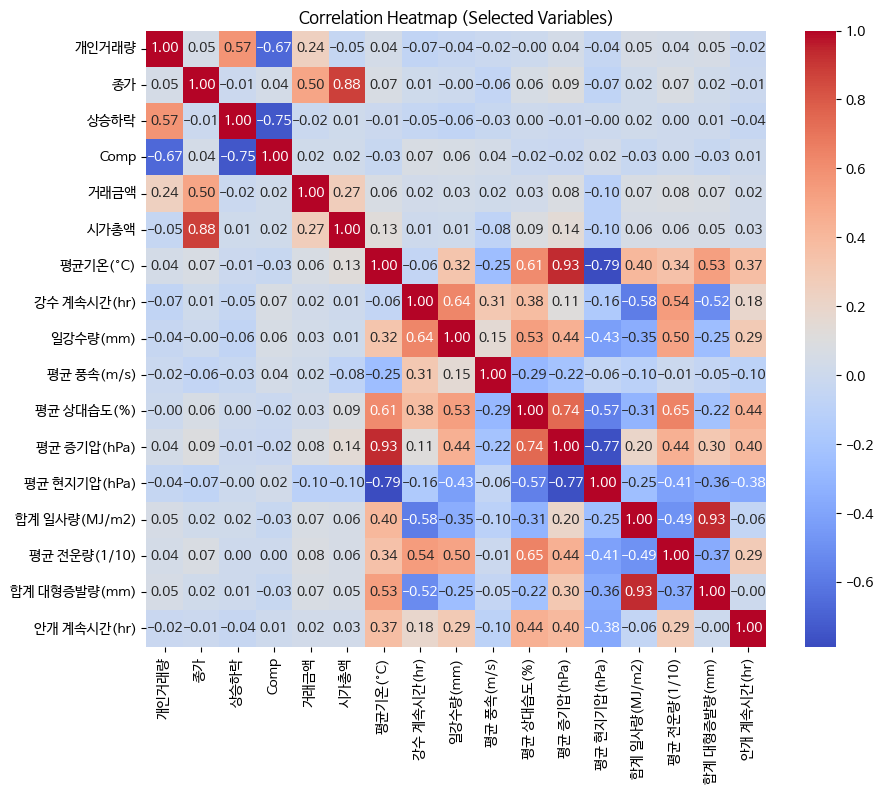

In [70]:
# 관심 있는 변수들만 선택
columns_of_interest = ['개인거래량', '종가', '상승하락', 'Comp', '거래금액', '시가총액', 
                      '평균기온(°C)', '강수 계속시간(hr)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)', 
                       '평균 증기압(hPa)', '평균 현지기압(hPa)', '합계 일사량(MJ/m2)', 
                       '평균 전운량(1/10)', 
                       '합계 대형증발량(mm)', '안개 계속시간(hr)']

# 해당 변수들만 상관관계 계산
correlation = df1[columns_of_interest].corr()['개인거래량'].sort_values(ascending=False)
print(correlation)

# 관심 있는 변수들만 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df1[columns_of_interest].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Selected Variables)")
plt.show()

In [71]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# 독립 변수 선택
X = df1[[ '종가', '상승하락', 'Comp', '거래금액', '시가총액',
        '강수 계속시간(hr)', '일강수량(mm)',
       '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)','합계 일사량(MJ/m2)',
       '평균 전운량(1/10)',
       '합계 대형증발량(mm)', '안개 계속시간(hr)']]

# 초기 VIF 계산
vif_df = calculate_vif(X)

# VIF가 높은 변수 필터링 (예: 10 이상인 경우)
high_vif = vif_df[vif_df["VIF"] > 10]
print(high_vif)

Empty DataFrame
Columns: [Variable, VIF]
Index: []


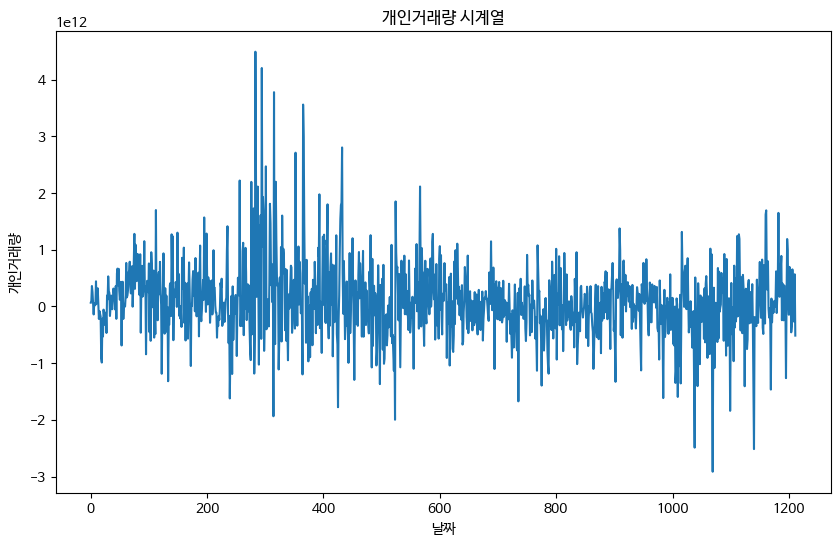

In [73]:
import matplotlib.pyplot as plt

# 시계열 데이터 시각화
df1['개인거래량'].plot(figsize=(10, 6))
plt.title("개인거래량 시계열")
plt.xlabel("날짜")
plt.ylabel("개인거래량")
plt.show()

In [74]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 변수 목록
variables = [
    '종가', '상승하락', 'Comp', '거래금액', '시가총액', '강수 계속시간(hr)', '일강수량(mm)',
    '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 해면기압(hPa)',
    '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)',
    '안개 계속시간(hr)', '개인거래량'
]

# ADF 검정 함수
def adf_test(series, signif=0.05):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    
    if result[1] < signif:
        print(f"주어진 시계열 데이터는 정상성을 가집니다. (p-value < {signif})")
    else:
        print(f"주어진 시계열 데이터는 비정상적입니다. (p-value >= {signif})")

# 각 변수에 대해 ADF 검정 실행
for var in variables:
    print(f'\n{var}에 대한 ADF 검정 결과:')
    adf_test(df1[var])
    print('-' * 50)


종가에 대한 ADF 검정 결과:
ADF Statistic: -1.7717877770616202
p-value: 0.39455547250060735
Critical Values: {'1%': np.float64(-3.435761408287299), '5%': np.float64(-2.863929614852828), '10%': np.float64(-2.568042270495956)}
주어진 시계열 데이터는 비정상적입니다. (p-value >= 0.05)
--------------------------------------------------

상승하락에 대한 ADF 검정 결과:
ADF Statistic: -34.10467634797039
p-value: 0.0
Critical Values: {'1%': np.float64(-3.435761408287299), '5%': np.float64(-2.863929614852828), '10%': np.float64(-2.568042270495956)}
주어진 시계열 데이터는 정상성을 가집니다. (p-value < 0.05)
--------------------------------------------------

Comp에 대한 ADF 검정 결과:
ADF Statistic: -34.55031034532206
p-value: 0.0
Critical Values: {'1%': np.float64(-3.435761408287299), '5%': np.float64(-2.863929614852828), '10%': np.float64(-2.568042270495956)}
주어진 시계열 데이터는 정상성을 가집니다. (p-value < 0.05)
--------------------------------------------------

거래금액에 대한 ADF 검정 결과:
ADF Statistic: -3.9918771804171684
p-value: 0.001453647084888788
Critical Values: {'1%

In [75]:
df1.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '개인거래량', '지점', '평균기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)',
       '합계 소형증발량(mm)', '안개 계속시간(hr)'],
      dtype='object')

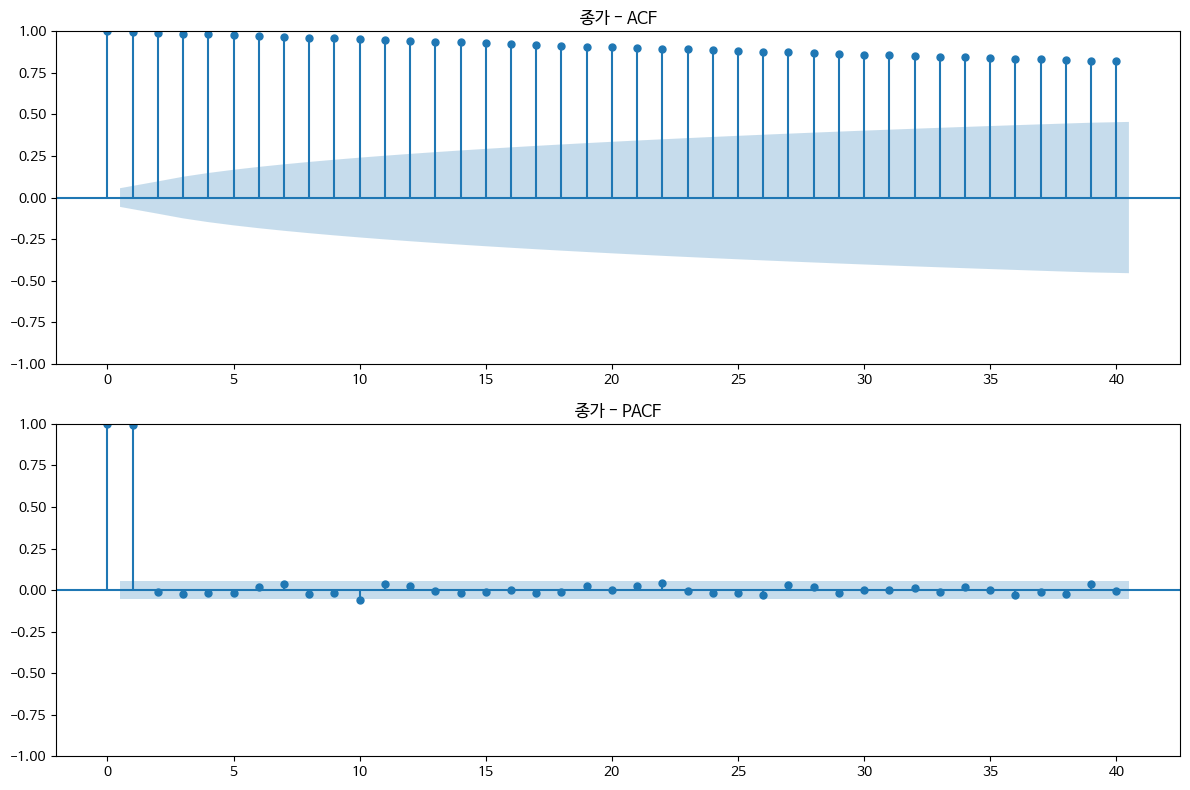

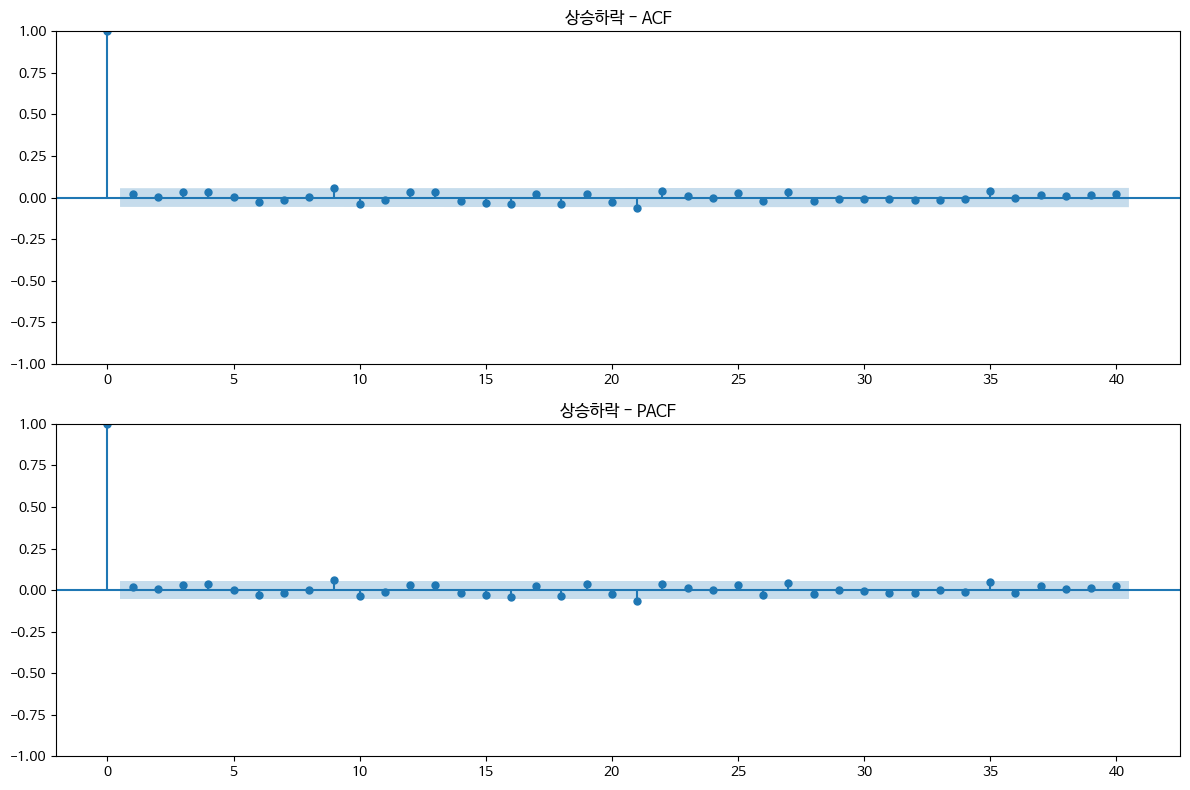

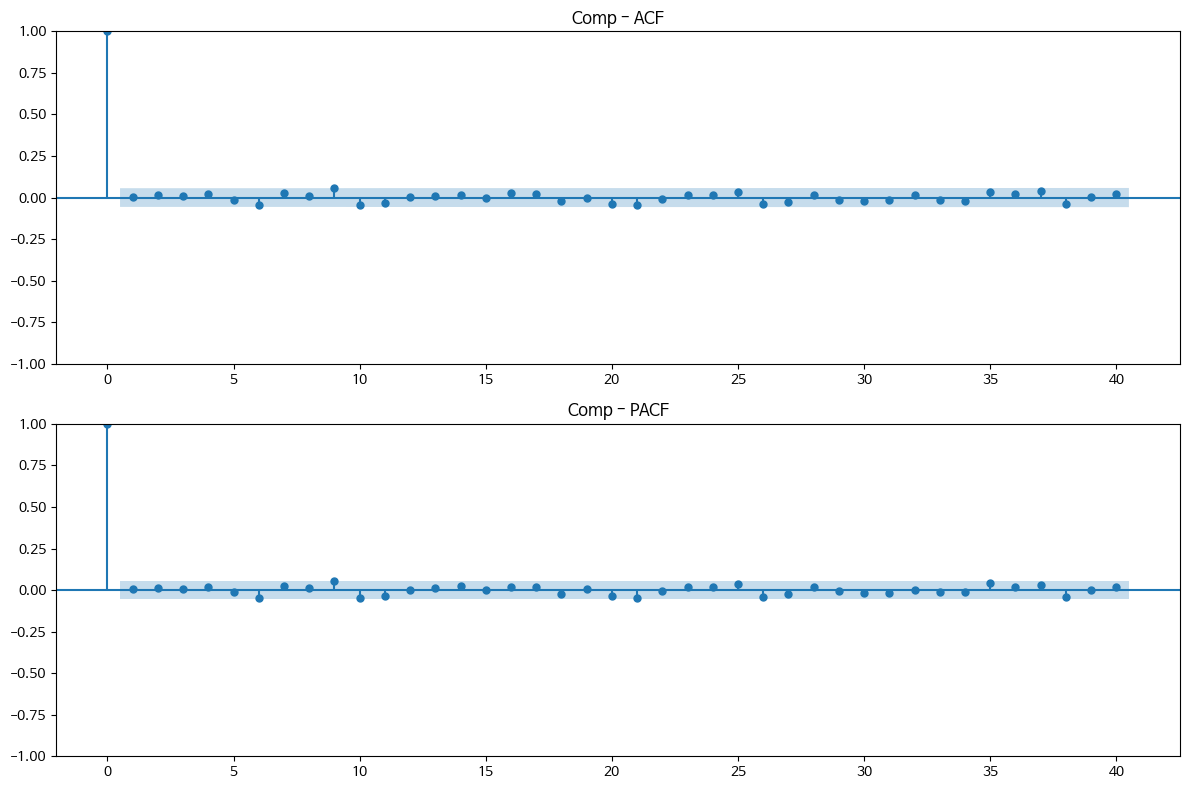

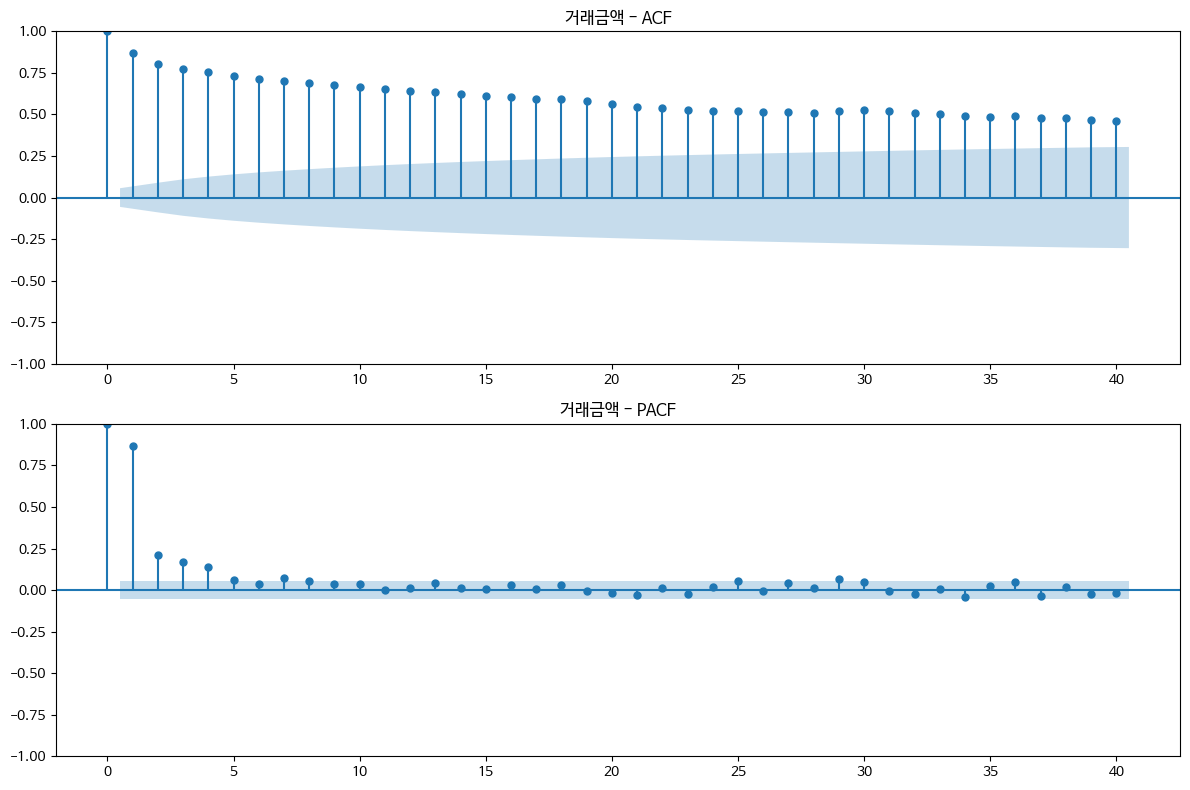

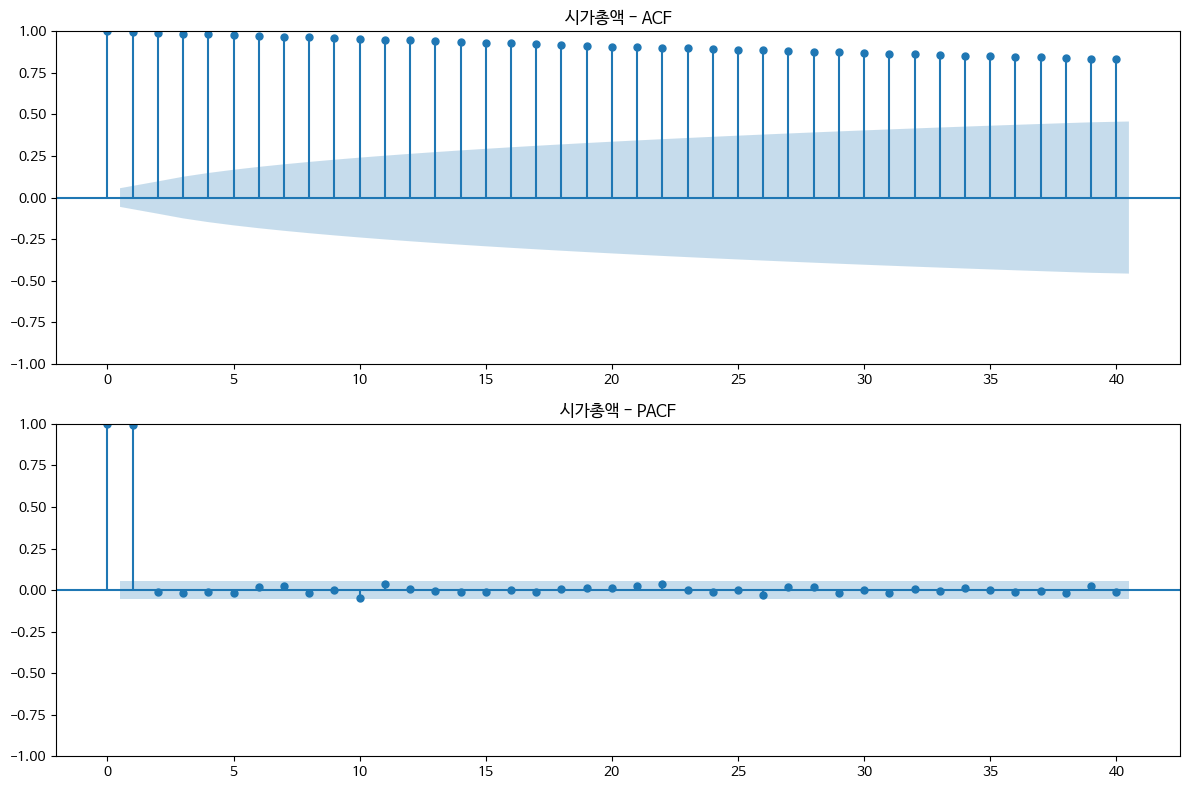

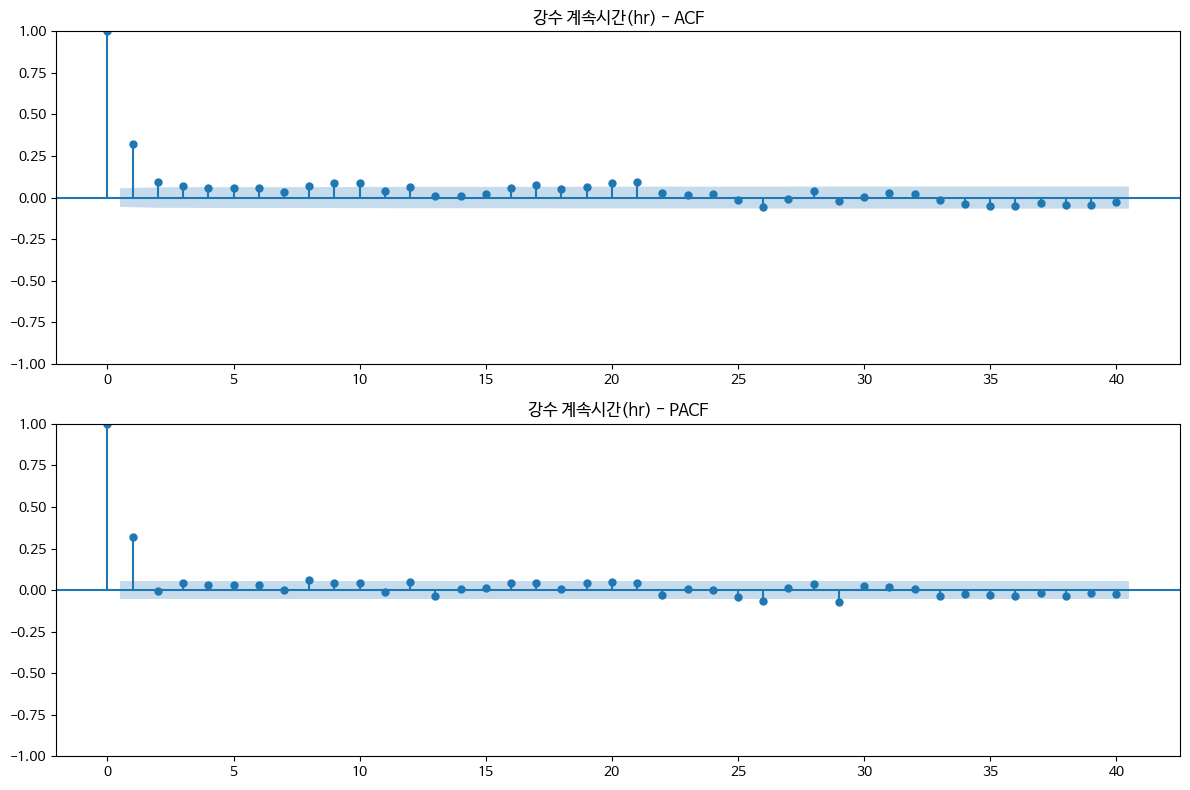

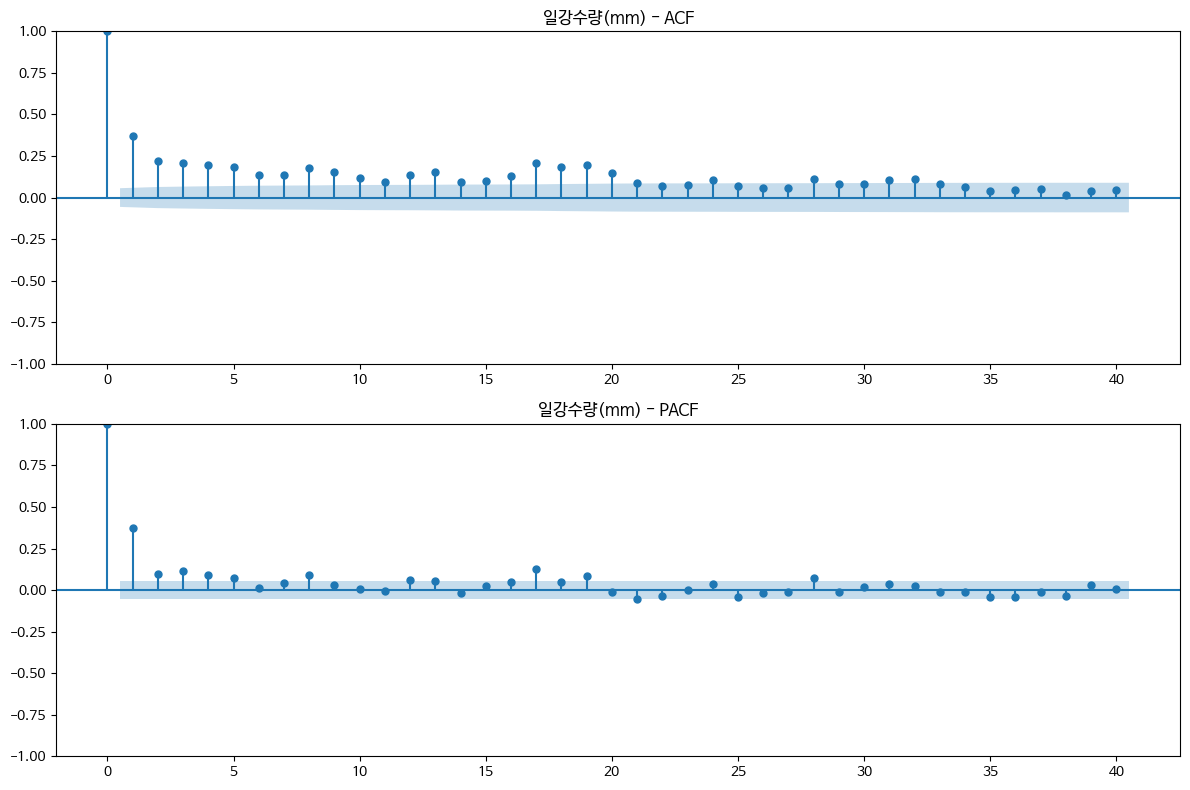

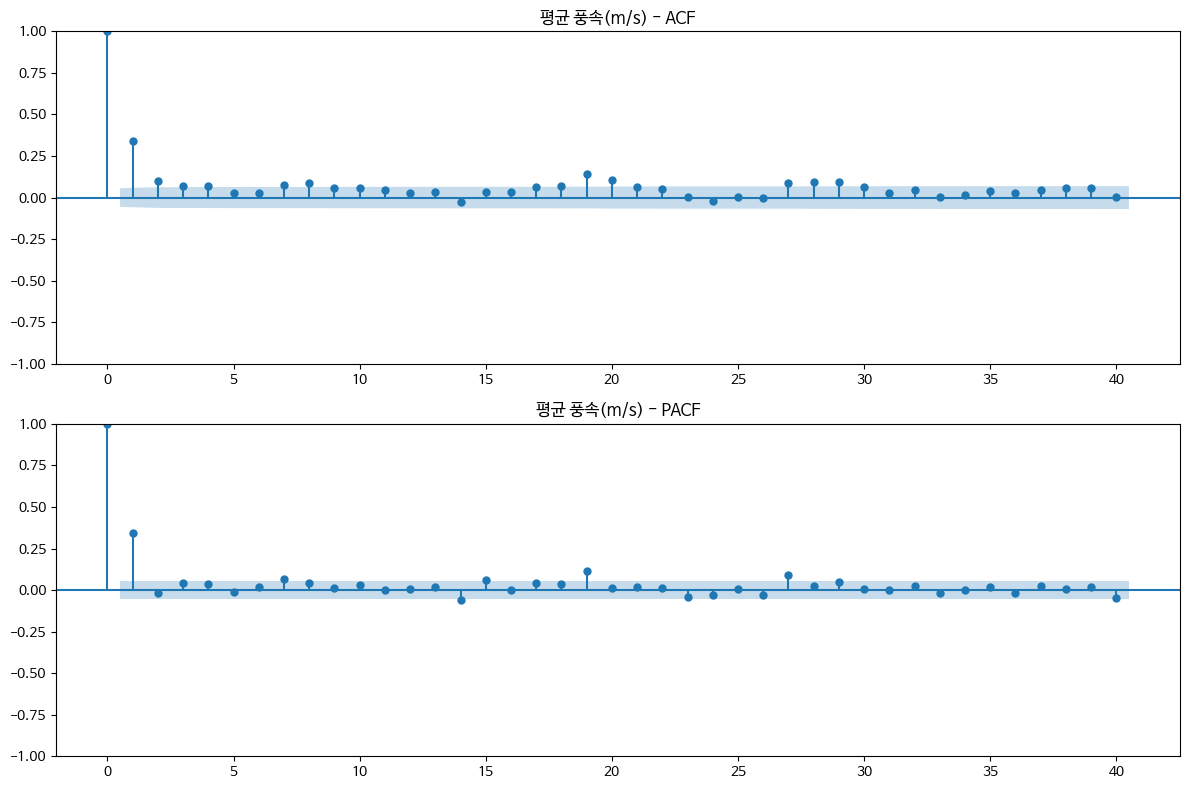

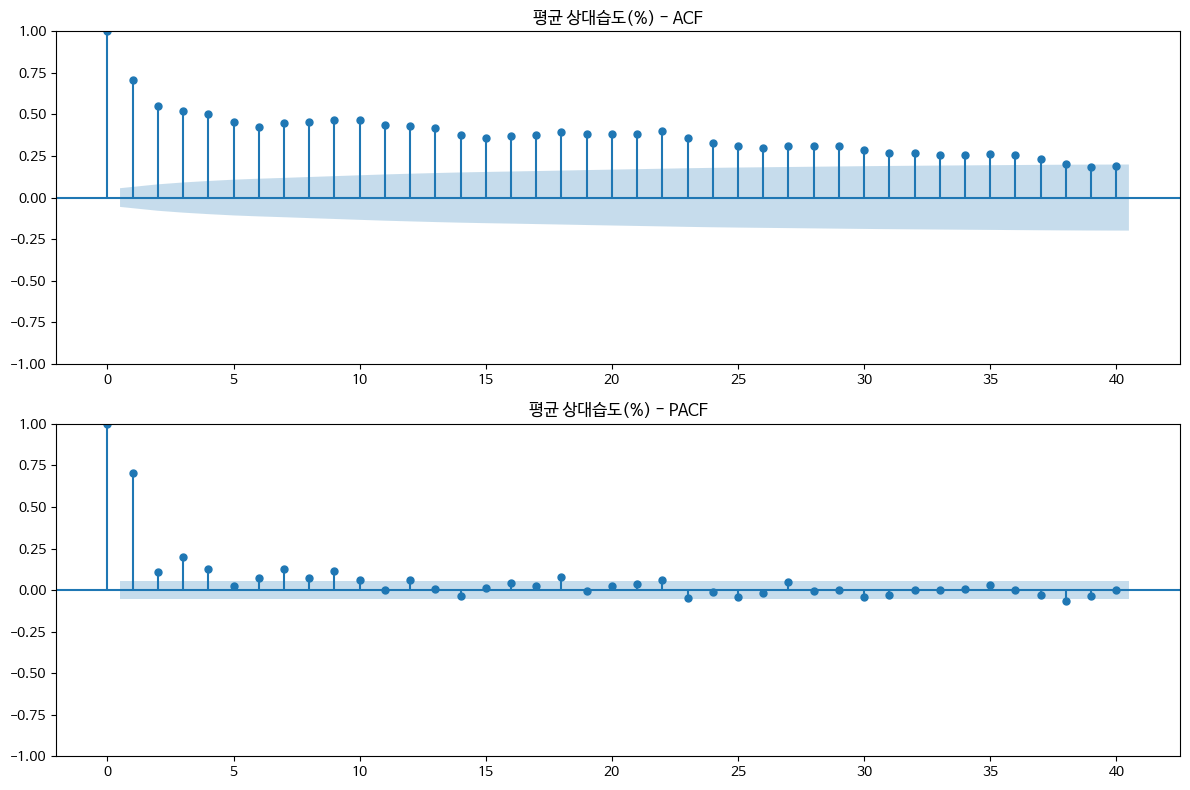

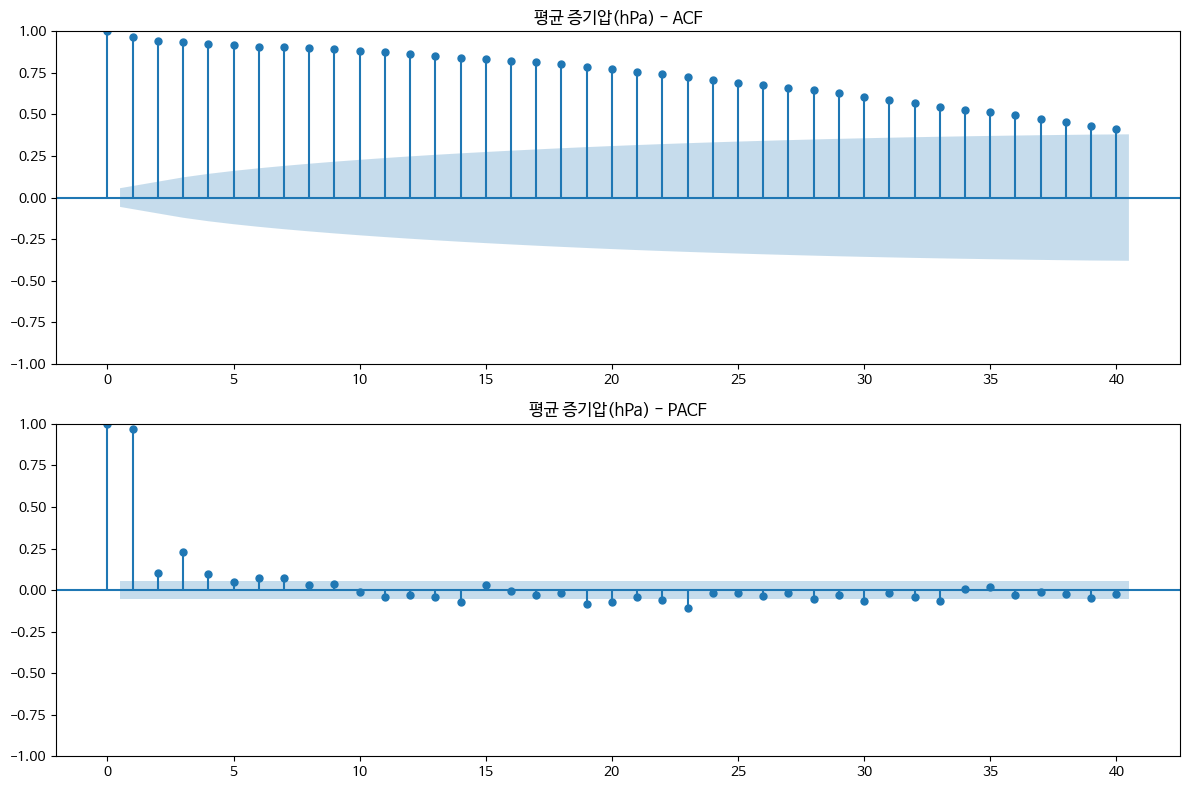

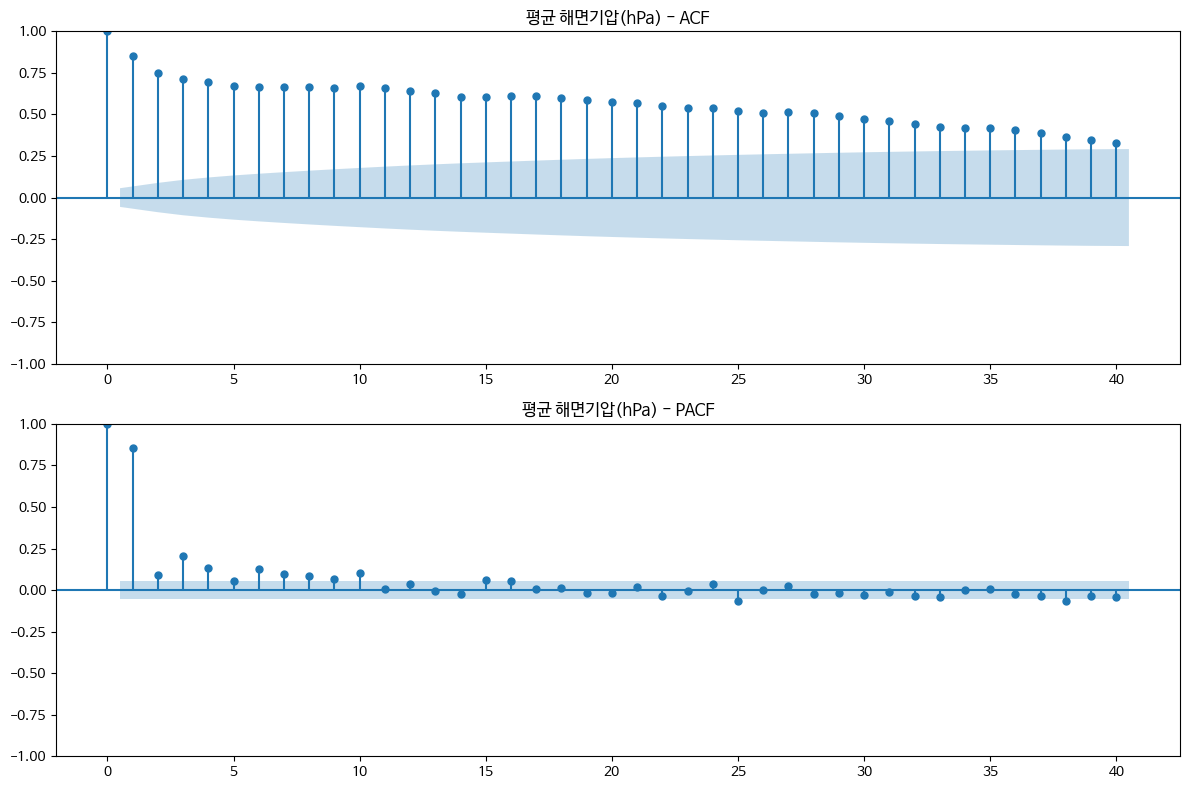

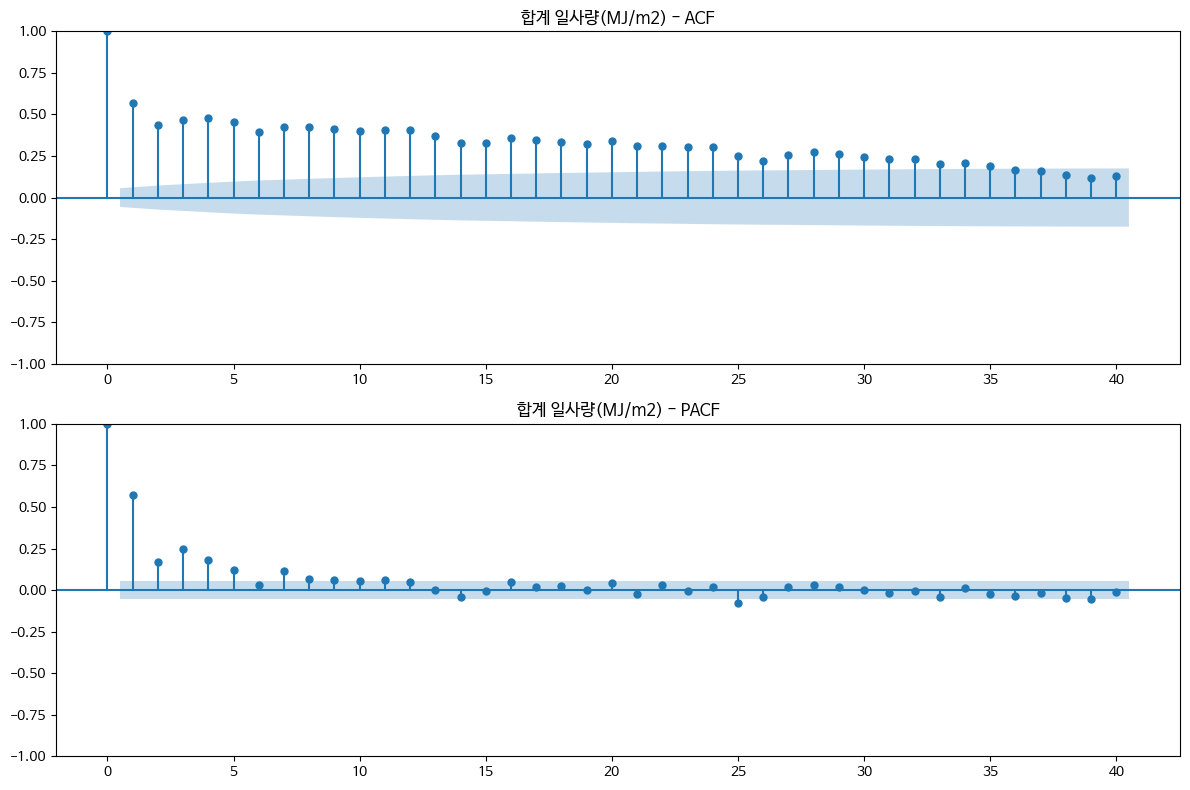

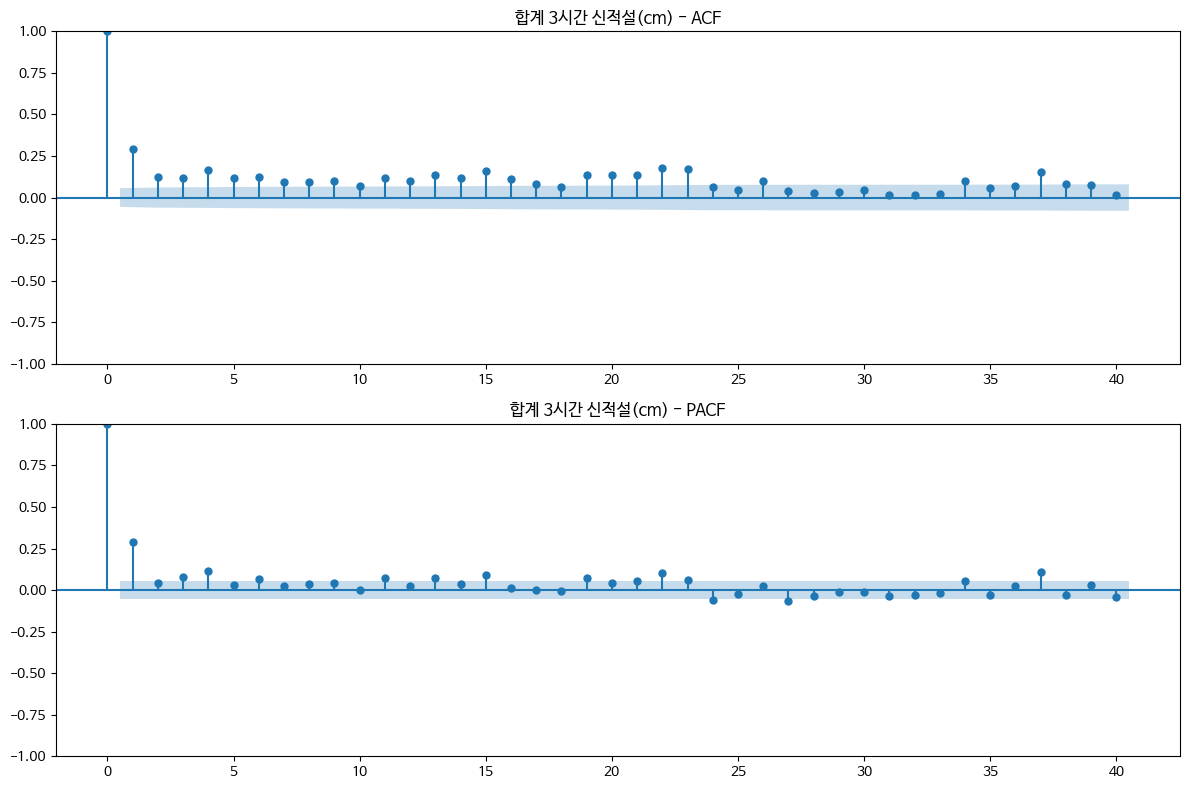

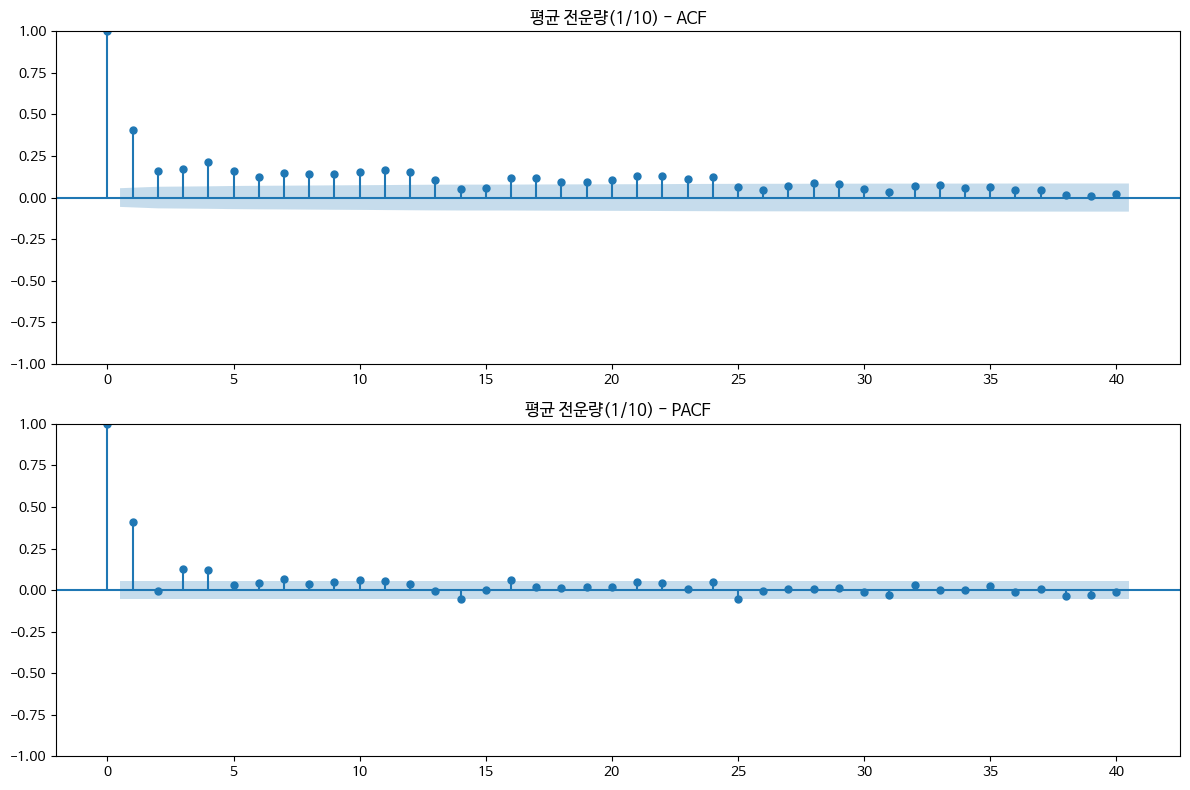

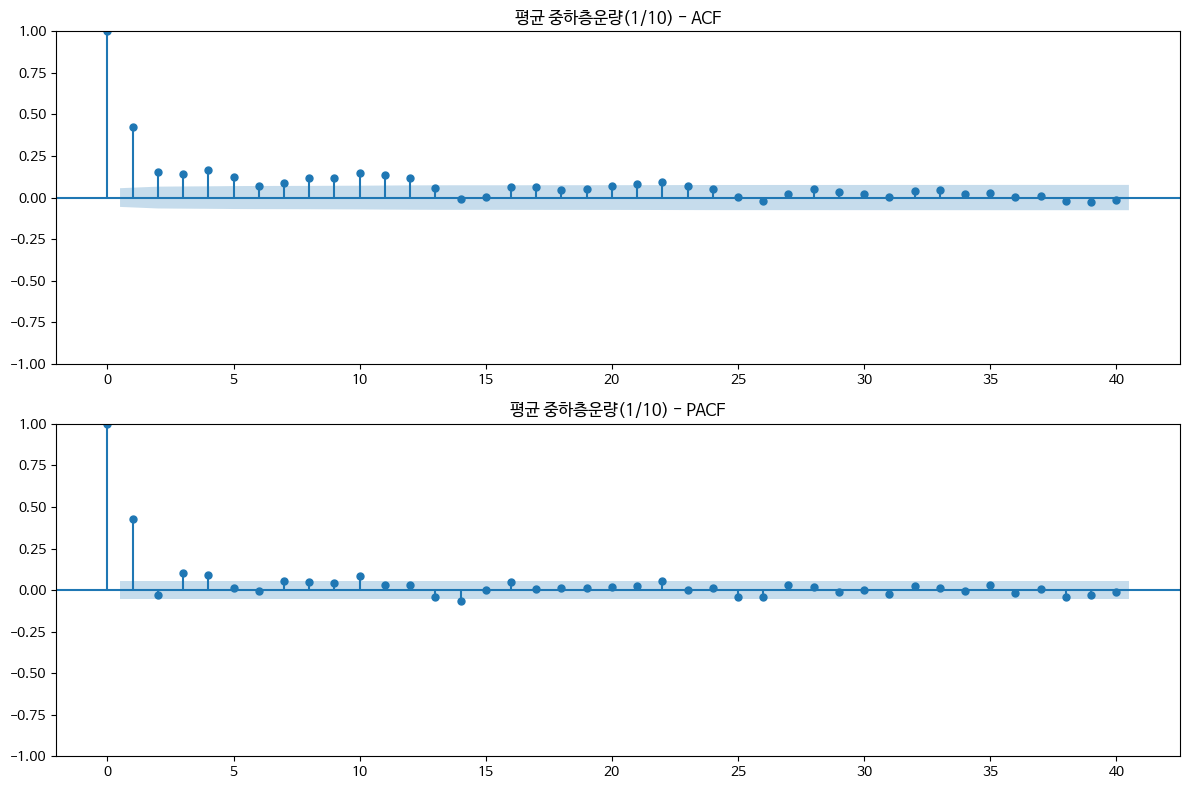

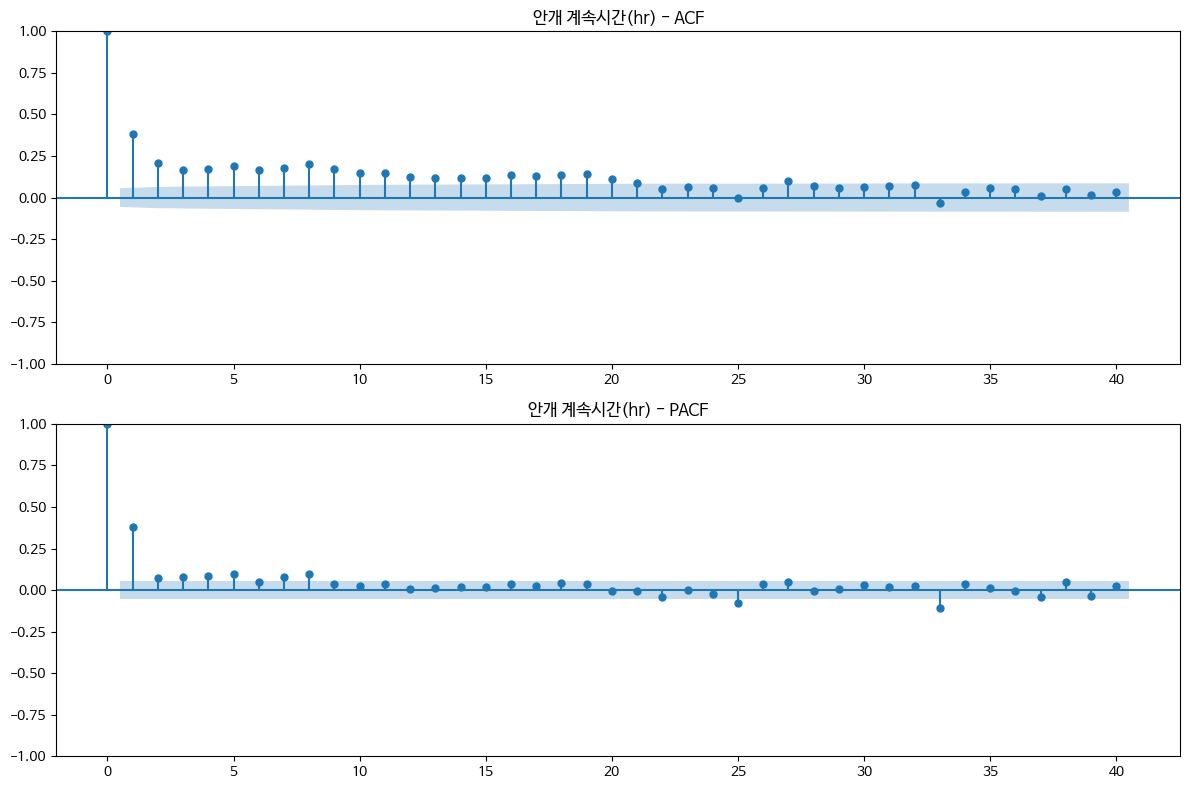

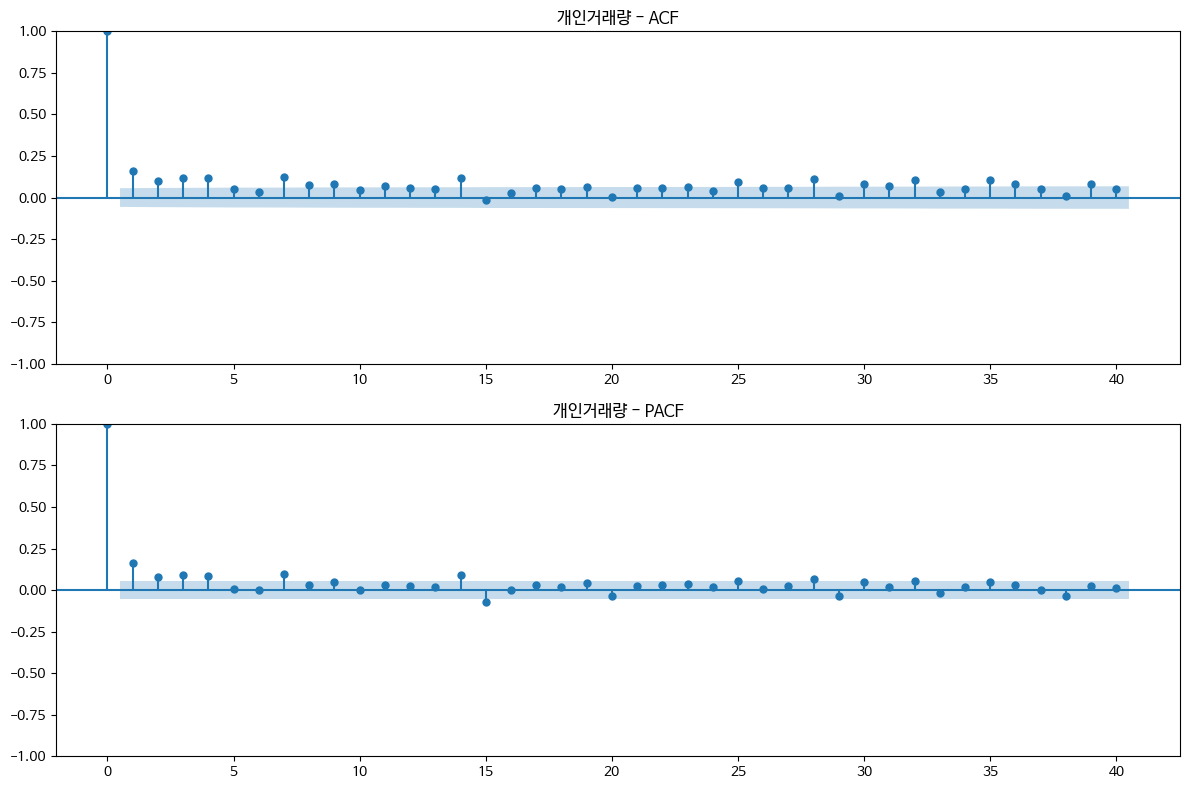

In [76]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 변수 목록
variables = [
    '종가', '상승하락', 'Comp', '거래금액', '시가총액', '강수 계속시간(hr)', '일강수량(mm)',
    '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 해면기압(hPa)',
    '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)',
    '안개 계속시간(hr)', '개인거래량'
]

# 모든 변수에 대해 ACF와 PACF 출력
for var in variables:
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    fig = sm.graphics.tsa.plot_acf(df1[var], lags=40, ax=ax1)
    fig = sm.graphics.tsa.plot_pacf(df1[var], lags=40, ax=ax2)
    
    ax1.set_title(f'{var} - ACF')
    ax2.set_title(f'{var} - PACF')
    
    plt.tight_layout()
    plt.show()

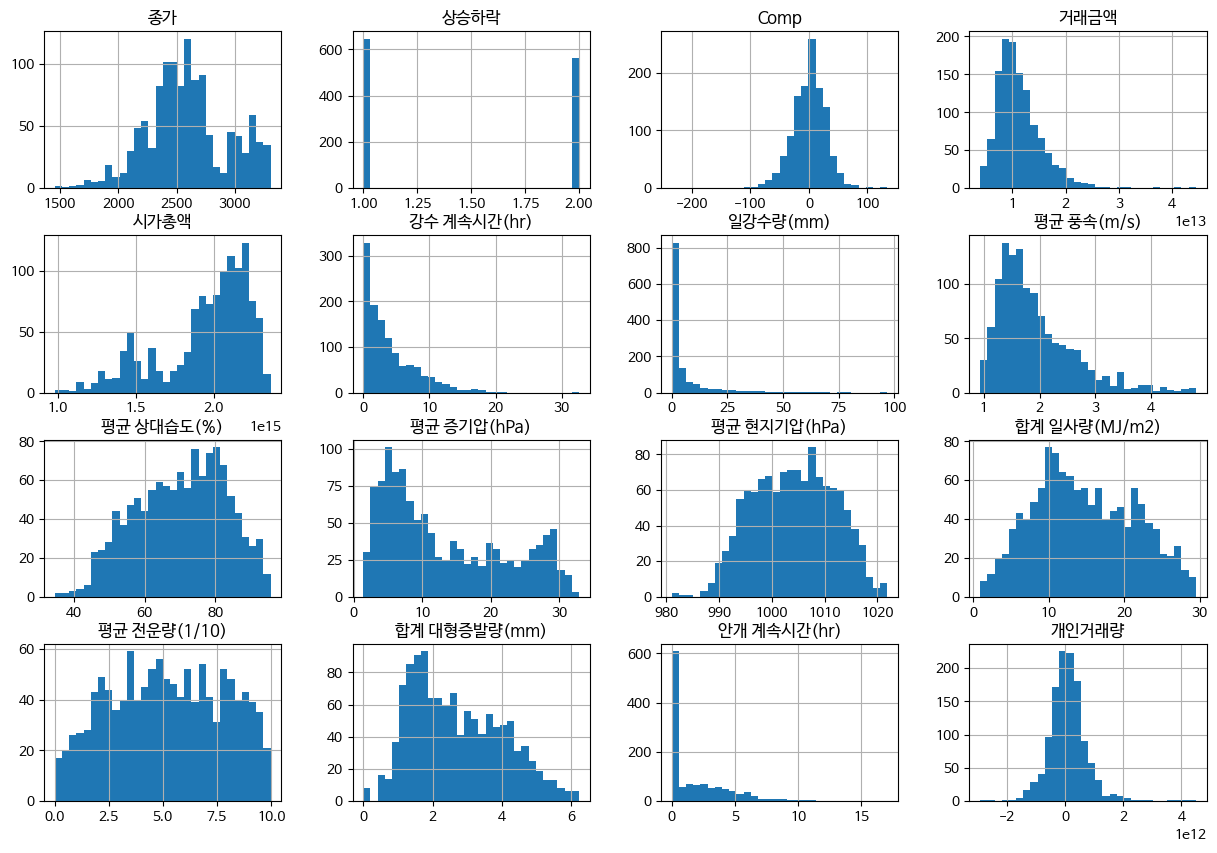

In [77]:
import matplotlib.pyplot as plt

# 변수의 분포를 히스토그램으로 확인
df1[['종가', '상승하락', 'Comp', '거래금액', '시가총액',
        '강수 계속시간(hr)', '일강수량(mm)',
       '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)','합계 일사량(MJ/m2)',
       '평균 전운량(1/10)',
       '합계 대형증발량(mm)', '안개 계속시간(hr)','개인거래량']].hist(bins=30, figsize=(15, 10))
plt.show()

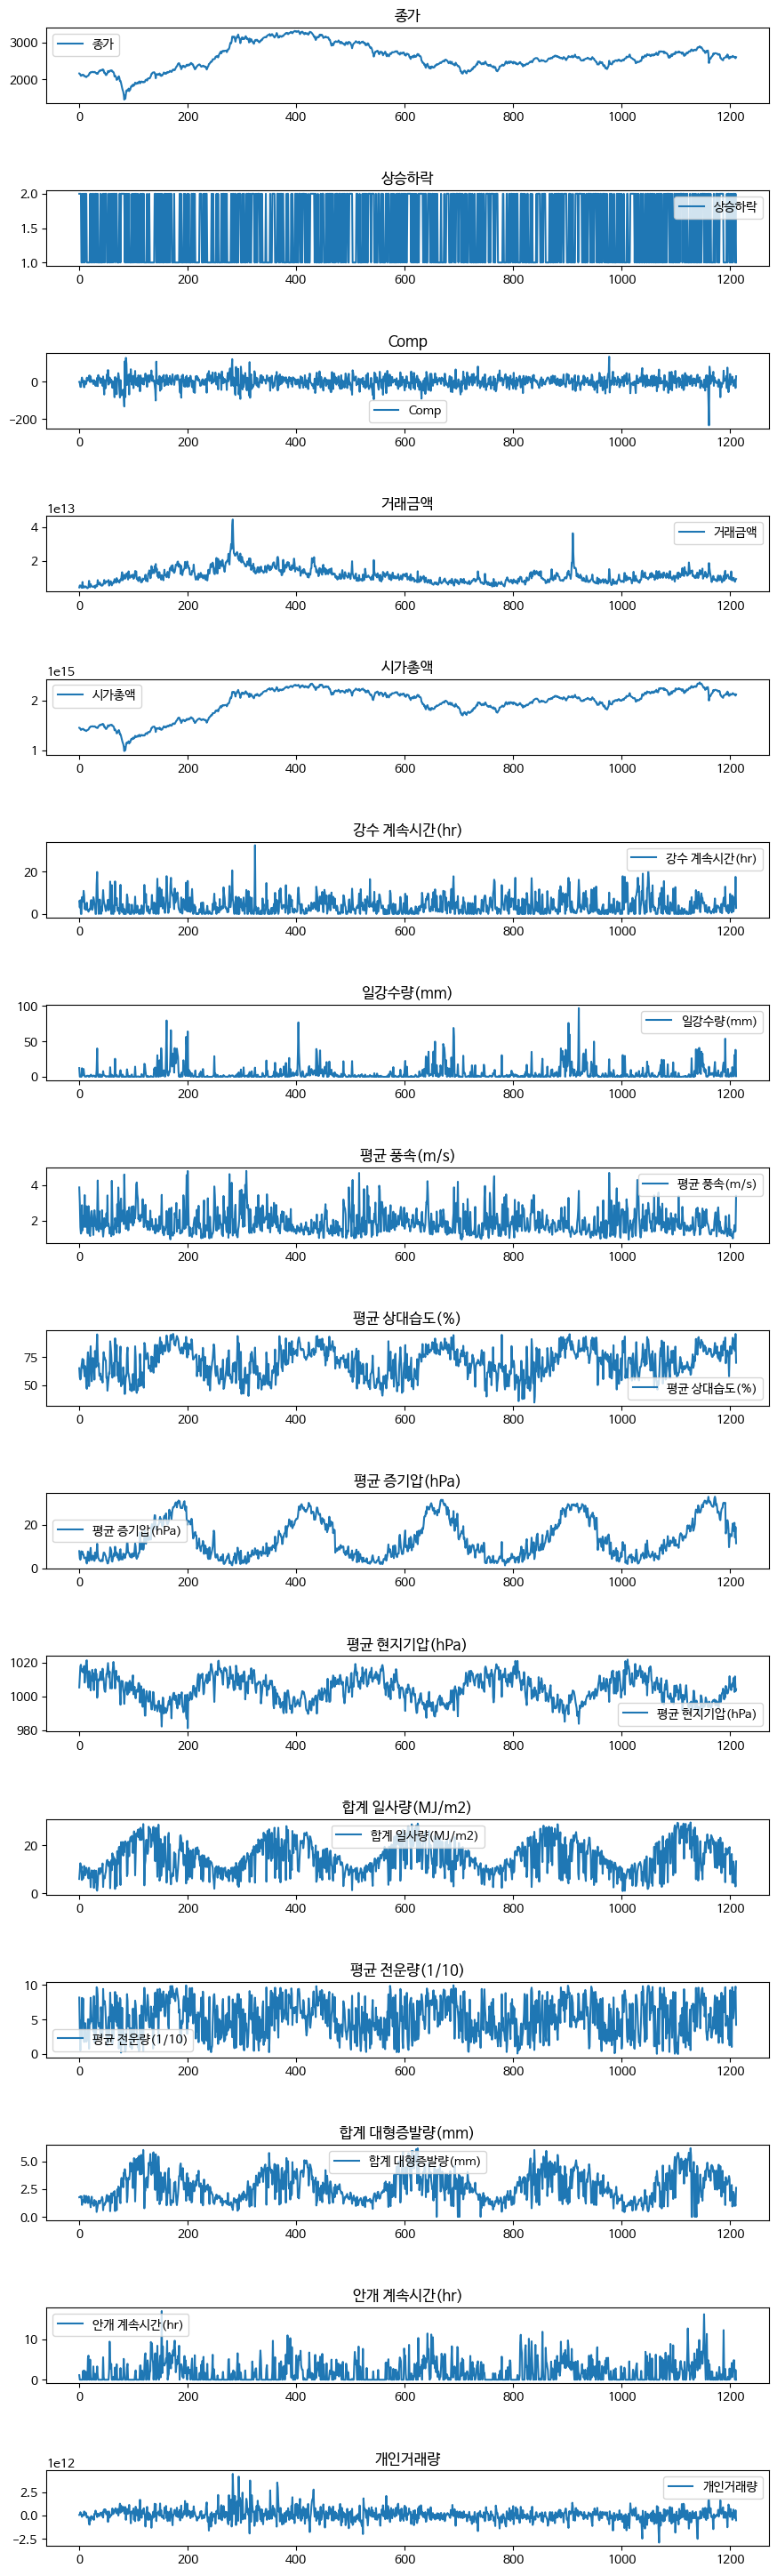

In [78]:
import matplotlib.pyplot as plt

# 컬럼 리스트
columns = ['종가', '상승하락', 'Comp', '거래금액', '시가총액',
           '강수 계속시간(hr)', '일강수량(mm)',
           '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)',
           '평균 현지기압(hPa)', '합계 일사량(MJ/m2)',
           '평균 전운량(1/10)', '합계 대형증발량(mm)', '안개 계속시간(hr)', '개인거래량']

# 그래프 생성
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 30))
fig.tight_layout(pad=5)

for i, col in enumerate(columns):
    axes[i].plot(df1[col], label=col)
    axes[i].set_title(col)
    axes[i].legend()

plt.show()

In [79]:
from scipy.stats import skew
print({col: skew(df1[col].dropna()) for col in columns})

{'종가': np.float64(0.029271991905119882), '상승하락': np.float64(0.13562429327732642), 'Comp': np.float64(-0.4395704533221407), '거래금액': np.float64(1.688430386655049), '시가총액': np.float64(-0.9948247510878238), '강수 계속시간(hr)': np.float64(1.5551978109169733), '일강수량(mm)': np.float64(3.6162734969426418), '평균 풍속(m/s)': np.float64(1.3825435948474434), '평균 상대습도(%)': np.float64(-0.21627502702238577), '평균 증기압(hPa)': np.float64(0.5674361384242765), '평균 현지기압(hPa)': np.float64(-0.05527946753390854), '합계 일사량(MJ/m2)': np.float64(0.18807210124815296), '평균 전운량(1/10)': np.float64(-0.03909516885462245), '합계 대형증발량(mm)': np.float64(0.42882870023547215), '안개 계속시간(hr)': np.float64(1.62380021331775), '개인거래량': np.float64(0.829292924220335)}


In [80]:
df1.describe()

,날짜,시가,고가,저가,종가,거래량,변동률,상승하락,Comp,거래금액,...,평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),안개 계속시간(hr)
count,1212,1212.000000,1212.000000,1212.000000,1212.000000,1.212000e+03,1212.000000,1212.000000,1212.000000,1.212000e+03,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,2022-05-02 16:29:42.178217984,2591.366955,2605.631361,2573.595644,2589.667360,7.165248e+08,0.000241,1.466172,0.379554,1.133170e+13,...,1004.134447,1016.318311,14.736988,0.346907,5.197995,3.037891,15.947615,2.700453,3.857725,1.905493
min,2019-11-18 00:00:00,1474.450000,1516.750000,1439.430000,1457.640000,2.406750e+08,-0.087700,1.000000,-234.640000,3.982512e+12,...,981.012632,992.613684,0.951321,0.000000,0.015464,-8.448454,-4.403158,0.000000,0.000000,0.000000
25%,2021-02-07 06:00:00,2380.292500,2389.887500,2360.672500,2375.670000,4.686254e+08,-0.006700,1.000000,-17.277500,8.448654e+12,...,998.158421,1009.794712,9.678529,0.000000,3.118528,1.411618,6.012648,1.582332,2.261418,0.000000
50%,2022-05-02 12:00:00,2573.655000,2585.450000,2558.290000,2570.785000,6.137641e+08,0.000700,1.000000,1.765000,1.049102e+13,...,1004.249512,1016.368514,13.987570,0.000000,5.141413,2.718391,16.346842,2.504356,3.573715,0.545000
75%,2023-07-24 06:00:00,2765.715000,2777.222500,2750.590000,2762.527500,8.664493e+08,0.007400,2.000000,19.312500,1.327417e+13,...,1010.080160,1022.673820,20.033764,0.000000,7.346115,4.593548,25.328497,3.700581,5.284798,3.286250
max,2024-10-23 00:00:00,3305.460000,3316.080000,3295.440000,3305.210000,3.455505e+09,0.086000,2.000000,134.030000,4.443377e+13,...,1021.930928,1035.251546,29.479180,24.700000,9.970526,8.028421,34.507368,6.219672,8.886885,17.080000
std,NaN,347.750546,347.984582,347.644574,347.591272,3.533429e+08,0.012644,0.499060,30.343160,4.233383e+12,...,7.606399,8.078122,6.583423,1.425433,2.593416,1.979873,10.403142,1.312162,1.874351,2.565414


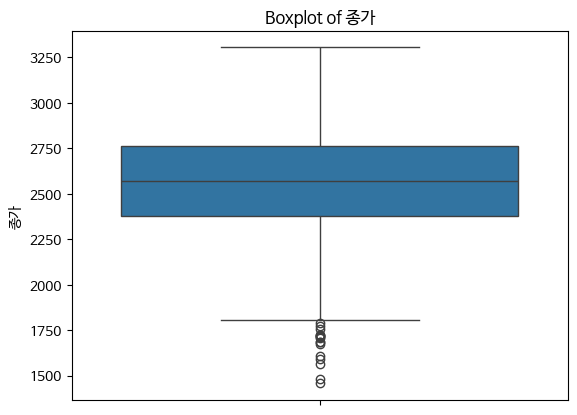

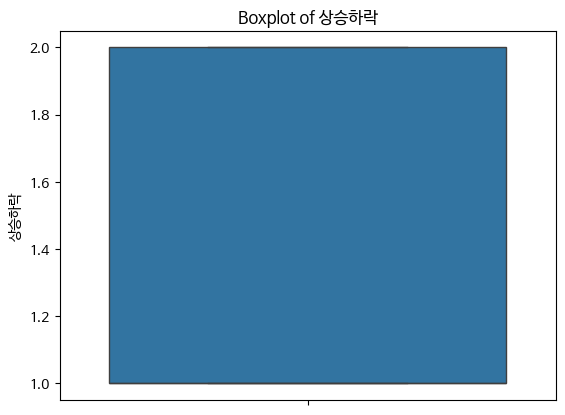

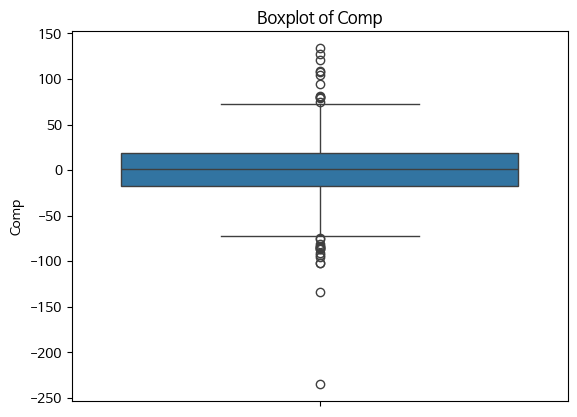

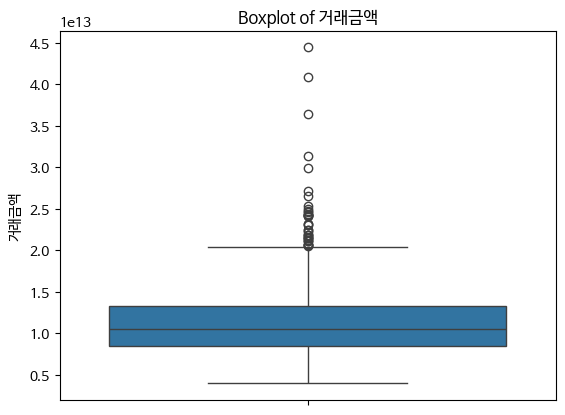

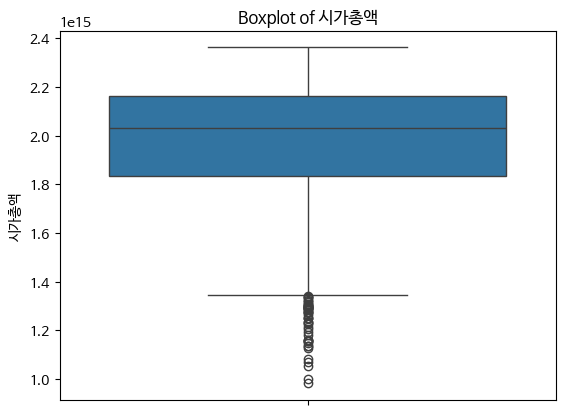

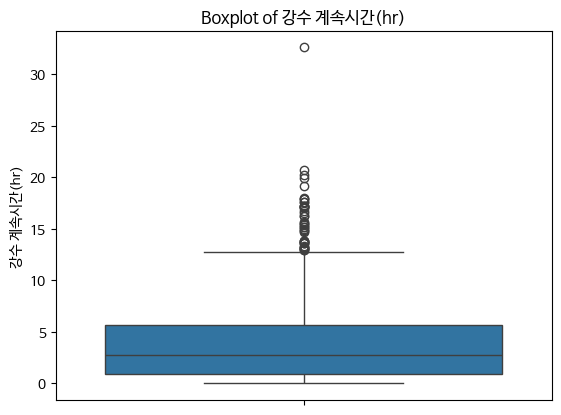

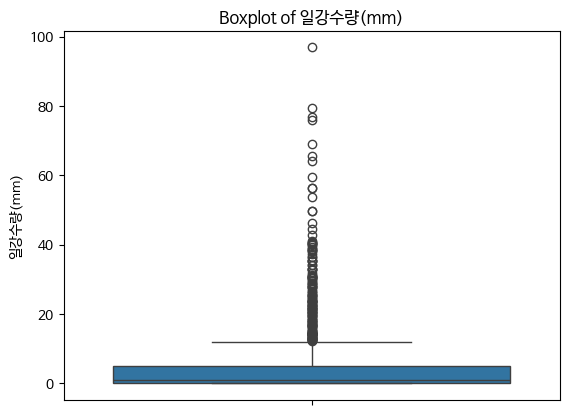

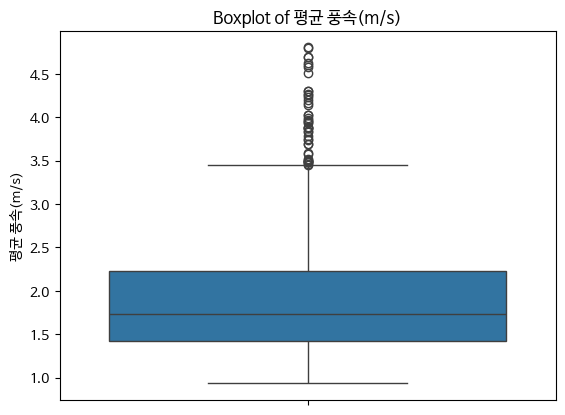

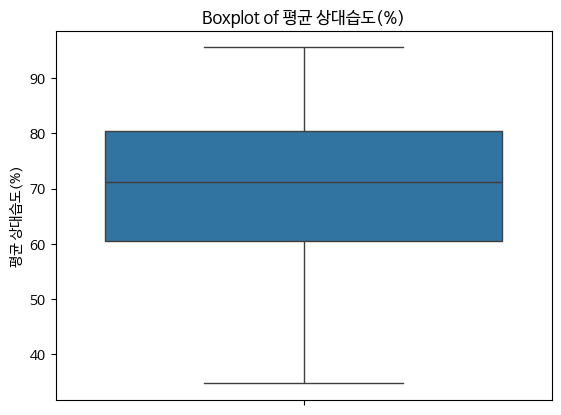

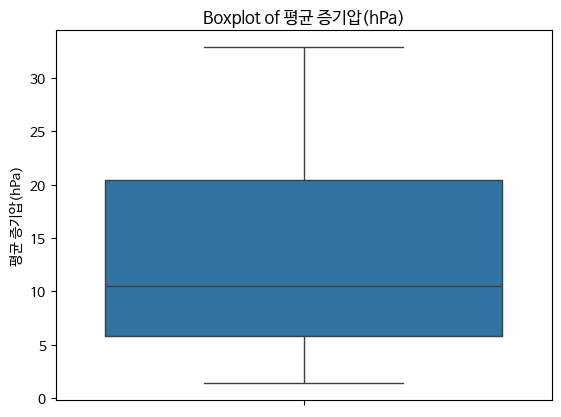

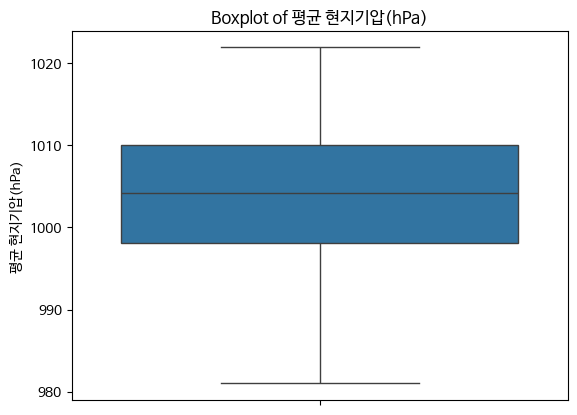

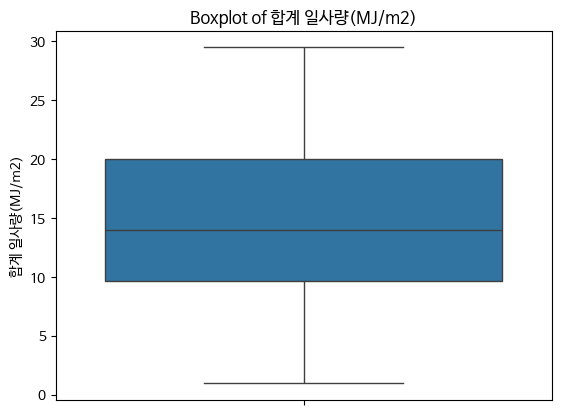

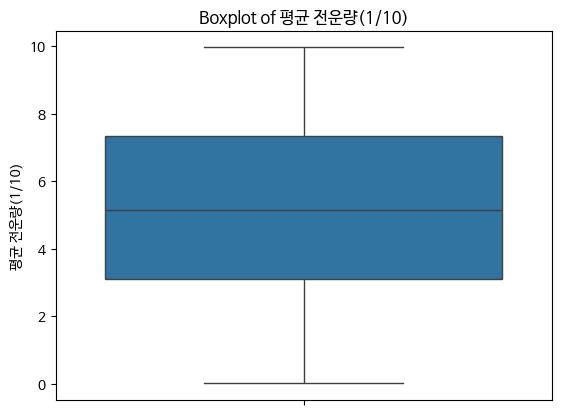

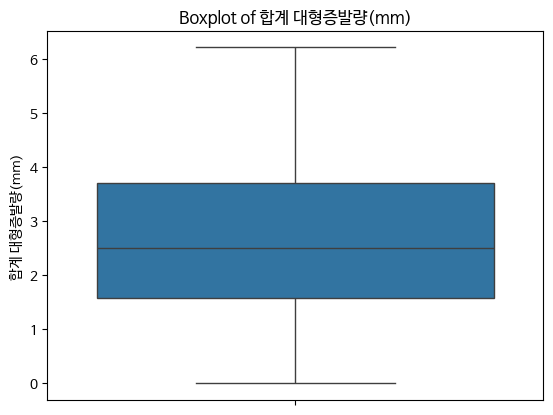

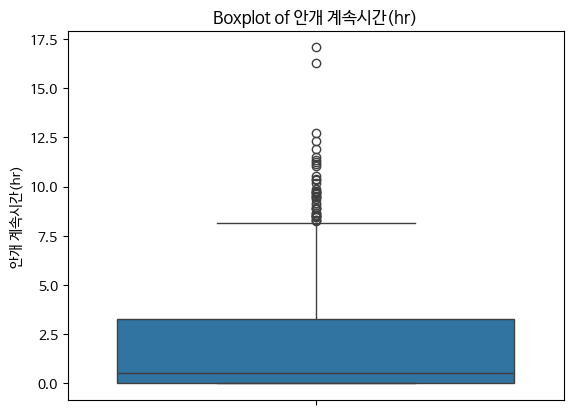

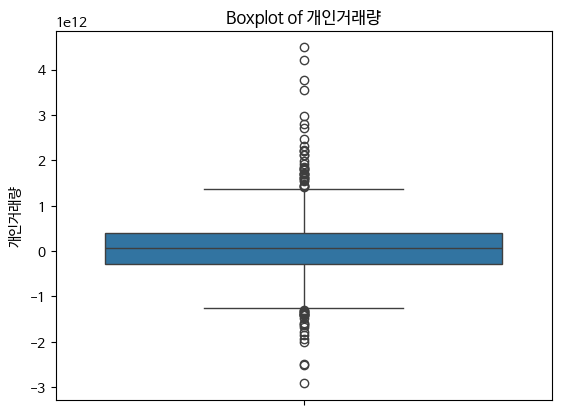

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['종가', '상승하락', 'Comp', '거래금액', '시가총액',
           '강수 계속시간(hr)', '일강수량(mm)',
           '평균 풍속(m/s)', '평균 상대습도(%)', '평균 증기압(hPa)',
           '평균 현지기압(hPa)', '합계 일사량(MJ/m2)',
           '평균 전운량(1/10)', '합계 대형증발량(mm)', '안개 계속시간(hr)', '개인거래량']
for col in columns:
    sns.boxplot(data=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

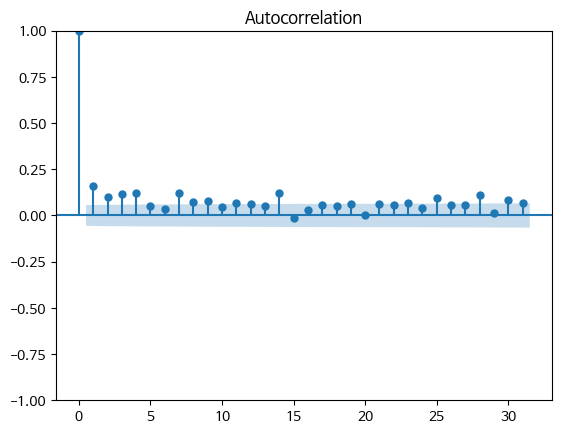

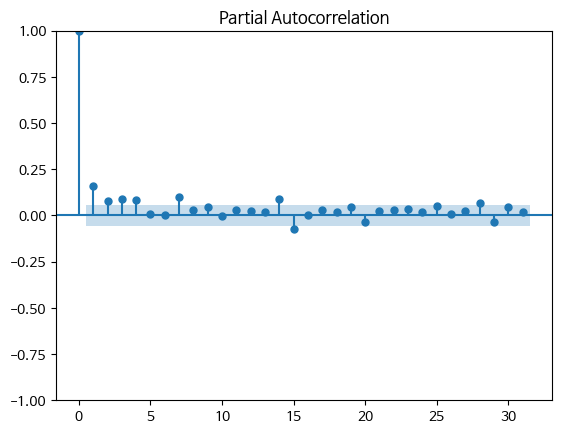

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# '개인거래량'에 대해 ACF, PACF 확인
plot_acf(df1['개인거래량'])
plot_pacf(df1['개인거래량'])
plt.show()

In [83]:
# 시가총액과 종가의 차분 계산 후 새로운 열에 저장
#df1['시가총액수정'] = df1['시가총액'].diff()
#df1['종가수정'] = df1['종가'].diff()

# 결과 출력
#print(df1)

In [84]:
# 변환된 변수들의 통계 확인
#print(df1[variables].describe())

In [85]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [86]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
df1.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '개인거래량', '지점', '평균기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)',
       '합계 소형증발량(mm)', '안개 계속시간(hr)'],
      dtype='object')

In [89]:
# 강수 계속시간 (hr) 기준: 1시간 이상이면 1, 아니면 0
df1['강수 계속시간_dummy'] = (df1['강수 계속시간(hr)'] >= 1).astype(int)

# 평균 풍속 (m/s) 기준: 5m/s 이상이면 1, 아니면 0
df1['평균 풍속_dummy'] = (df1['평균 풍속(m/s)'] >= 5).astype(int)

# 평균 증기압 (hPa) 기준: 10hPa 이상이면 1, 아니면 0
df1['평균 증기압_dummy'] = (df1['평균 증기압(hPa)'] >= 10).astype(int)

# 평균 현지기압 (hPa) 기준: 1010 hPa 이상이면 1, 아니면 0
df1['평균 현지기압_dummy'] = (df1['평균 현지기압(hPa)'] >= 1010).astype(int)

# 합계 일사량 (MJ/m²) 기준: 15 MJ/m² 이상이면 1, 아니면 0
df1['합계 일사량_dummy'] = (df1['합계 일사량(MJ/m2)'] >= 15).astype(int)

# 평균 전운량 (1/10) 기준: 5/10 이상이면 1, 아니면 0
df1['평균 전운량_dummy'] = (df1['평균 전운량(1/10)'] >= 5).astype(int)

# 결과 출력
print(df1[['강수 계속시간_dummy', '평균 풍속_dummy', '평균 증기압_dummy', '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy']].head())

   강수 계속시간_dummy  평균 풍속_dummy  평균 증기압_dummy  평균 현지기압_dummy  합계 일사량_dummy  \
0              1            0             0              0             0   
1              1            0             0              1             0   
2              1            0             0              1             0   
3              0            0             0              1             0   
4              0            0             0              1             0   

   평균 전운량_dummy  
0             1  
1             0  
2             0  
3             0  
4             0  


In [90]:
# 결과 출력
print(df1[['강수 계속시간_dummy', '평균 풍속_dummy', '평균 증기압_dummy', '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy']].head())

   강수 계속시간_dummy  평균 풍속_dummy  평균 증기압_dummy  평균 현지기압_dummy  합계 일사량_dummy  \
0              1            0             0              0             0   
1              1            0             0              1             0   
2              1            0             0              1             0   
3              0            0             0              1             0   
4              0            0             0              1             0   

   평균 전운량_dummy  
0             1  
1             0  
2             0  
3             0  
4             0  


In [91]:
df1.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '변동률', '상승하락', 'Comp', '거래금액',
       '시가총액', 'Close', '수익률', '개인거래량', '지점', '평균기온(°C)', '강수 계속시간(hr)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '합계 3시간 신적설(cm)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)',
       '합계 소형증발량(mm)', '안개 계속시간(hr)', '강수 계속시간_dummy', '평균 풍속_dummy',
       '평균 증기압_dummy', '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy'],
      dtype='object')

In [92]:
# 필요한 컬럼 리스트
required_columns = ['개인거래량', '종가', '거래금액', '시가총액', 
                    '강수 계속시간_dummy', '평균 풍속_dummy', '평균 증기압_dummy', 
                    '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy']

# 누락된 컬럼 확인
missing_columns = [col for col in required_columns if col not in df1.columns]
if missing_columns:
    raise KeyError(f"다음 컬럼이 데이터프레임에 없습니다: {missing_columns}")

# 필요한 컬럼으로 새로운 데이터프레임 생성
df2 = df1[required_columns]

In [93]:
from statsmodels.tsa.stattools import adfuller

# 정상성 검정 함수 정의
def check_stationarity(series, column_name):
    if series.nunique() == 1:  # 모든 값이 동일한 경우
        print(f"'{column_name}' 열은 모든 값이 동일합니다. 정상성 검정을 건너뜁니다.")
        return None
    result = adfuller(series.dropna())  # NaN 값 제거
    print(f"\n[정상성 검정 결과: {column_name}]")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}")
    if result[1] <= 0.05:
        print(f"'{column_name}'는 정상성을 만족합니다 (p-value <= 0.05).")
    else:
        print(f"'{column_name}'는 정상성이 없습니다 (p-value > 0.05).")
    return result[1] <= 0.05

# 테스트할 열 목록
columns_to_test = [
    '개인거래량', '종가', '거래금액', '시가총액', 
    '강수 계속시간_dummy', '평균 풍속_dummy', '평균 증기압_dummy', 
    '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy'
]

# 각 열에 대해 정상성 검정 수행
for col in columns_to_test:
    if col in df1.columns:
        check_stationarity(df1[col], col)
    else:
        print(f"'{col}' 열이 데이터프레임에 존재하지 않습니다.")


[정상성 검정 결과: 개인거래량]
ADF Statistic: -6.7827
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'개인거래량'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 종가]
ADF Statistic: -1.7718
p-value: 0.3946
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'종가'는 정상성이 없습니다 (p-value > 0.05).

[정상성 검정 결과: 거래금액]
ADF Statistic: -3.9919
p-value: 0.0015
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'거래금액'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 시가총액]
ADF Statistic: 0.5749
p-value: 0.9870
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'시가총액'는 정상성이 없습니다 (p-value > 0.05).

[정상성 검정 결과: 강수 계속시간_dummy]
ADF Statistic: -6.8930
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'강수 계속시간_dummy'는 정상성을 만족합니다 (p-value <= 0.05).
'평균 풍속_dummy' 열은 모든 값이 동일합니다. 정상성 검정을 건너뜁니다.

[정상성 검정 결과: 평균 증기압_dummy]
ADF Statistic: -2.6465
p-value: 0.0838
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'평균 증기압_dummy'는 정상성이 없습니다 (p-value > 0.05).

[정상성 검정 결과:

In [94]:
# 정상성이 없는 열 목록
columns_to_differential = ['종가', '시가총액', '평균 증기압_dummy']

# 차분 수행 및 새로운 열 추가
for col in columns_to_differential:
    if col in df1.columns:
        df1[f'{col}_diff'] = df1[col].diff()  # 1차 차분 수행
        print(f"'{col}' 열에 대해 차분을 수행하였습니다. 새로운 열: '{col}_diff'")

# 차분 후 데이터 확인
print(df1.head())

'종가' 열에 대해 차분을 수행하였습니다. 새로운 열: '종가_diff'
'시가총액' 열에 대해 차분을 수행하였습니다. 새로운 열: '시가총액_diff'
'평균 증기압_dummy' 열에 대해 차분을 수행하였습니다. 새로운 열: '평균 증기압_dummy_diff'
          날짜       시가       고가       저가       종가        거래량     변동률  상승하락  \
0 2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007     2   
1 2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034     2   
2 2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130     2   
3 2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135     2   
4 2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026     1   

    Comp           거래금액  ...  안개 계속시간(hr)  강수 계속시간_dummy  평균 풍속_dummy  \
0  -1.49  4450920014374  ...     1.136667              1            0   
1  -7.45  5605578491223  ...     0.000000              1            0   
2 -27.92  5583376749873  ...     0.000000              1            0   
3 -28.72  5437430115891  ...     0.000000              0            0   
4   5.36  4310267738915  

In [95]:
from statsmodels.tsa.stattools import adfuller

# 정상성 검정 함수 정의
def check_stationarity(series, column_name):
    if series.nunique() == 1:  # 모든 값이 동일한 경우
        print(f"'{column_name}' 열은 모든 값이 동일합니다. 정상성 검정을 건너뜁니다.")
        return None
    result = adfuller(series.dropna())  # NaN 값 제거
    print(f"\n[정상성 검정 결과: {column_name}]")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}")
    if result[1] <= 0.05:
        print(f"'{column_name}'는 정상성을 만족합니다 (p-value <= 0.05).")
    else:
        print(f"'{column_name}'는 정상성이 없습니다 (p-value > 0.05).")
    return result[1] <= 0.05

# 테스트할 열 목록
columns_to_test = [
    '개인거래량', '종가_diff', '거래금액', '시가총액_diff', 
    '강수 계속시간_dummy', '평균 풍속_dummy', '평균 증기압_dummy_diff', 
    '평균 현지기압_dummy', '합계 일사량_dummy', '평균 전운량_dummy'
]

# 각 열에 대해 정상성 검정 수행
for col in columns_to_test:
    if col in df1.columns:
        check_stationarity(df1[col], col)
    else:
        print(f"'{col}' 열이 데이터프레임에 존재하지 않습니다.")


[정상성 검정 결과: 개인거래량]
ADF Statistic: -6.7827
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'개인거래량'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 종가_diff]
ADF Statistic: -34.5159
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'종가_diff'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 거래금액]
ADF Statistic: -3.9919
p-value: 0.0015
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'거래금액'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 시가총액_diff]
ADF Statistic: -34.2957
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8639
	10%: -2.5680
'시가총액_diff'는 정상성을 만족합니다 (p-value <= 0.05).

[정상성 검정 결과: 강수 계속시간_dummy]
ADF Statistic: -6.8930
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'강수 계속시간_dummy'는 정상성을 만족합니다 (p-value <= 0.05).
'평균 풍속_dummy' 열은 모든 값이 동일합니다. 정상성 검정을 건너뜁니다.

[정상성 검정 결과: 평균 증기압_dummy_diff]
ADF Statistic: -11.7923
p-value: 0.0000
Critical Values:
	1%: -3.4358
	5%: -2.8640
	10%: -2.5681
'평균 증기압_dummy_diff'는 정상

In [96]:
# 결측값을 앞의 값으로 채우기
df1[['종가_diff', '시가총액_diff', '평균 증기압_dummy_diff']] = df1[['종가_diff', '시가총액_diff', '평균 증기압_dummy_diff']].fillna(method='bfill')

# 변경된 데이터 확인
print(df1[['종가_diff', '시가총액_diff', '평균 증기압_dummy_diff']].head())

   종가_diff     시가총액_diff  평균 증기압_dummy_diff
0    -7.45 -4.209624e+12                0.0
1    -7.45 -4.209624e+12                0.0
2   -27.92 -1.878026e+13                0.0
3   -28.72 -1.975938e+13                0.0
4     5.36  3.907706e+12                0.0


C:\Users\rltks\AppData\Local\Temp\ipykernel_13392\4270357460.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[['종가_diff', '시가총액_diff', '평균 증기압_dummy_diff']] = df1[['종가_diff', '시가총액_diff', '평균 증기압_dummy_diff']].fillna(method='bfill')


In [97]:
# CSV 파일 저장
file_path = r"C:\Users\rltks\data.csv"  # 파일 경로
df1.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8로 저장
print(f"파일이 {file_path}에 저장되었습니다.")

파일이 C:\Users\rltks\data.csv에 저장되었습니다.


In [98]:
import itertools
import numpy as np
import statsmodels.api as sm
import random

# 데이터 준비 (y_train은 훈련 데이터로, 예: 개인 거래량 데이터)
y_train = df1['개인거래량'][:80]  # 예시로 개인 거래량 데이터의 80% 사용

# 종속 변수로 사용할 다른 데이터 (차분된 종속 변수들)
exog = df1[['시가총액_diff', '거래금액']][:80]  # 예시로 차분된 '종가', '거래금액', '시가총액'

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# 랜덤으로 10개의 파라미터 조합을 선택
random_params = random.sample(pdq, 10)
random_seasonal_params = random.sample(seasonal_pdq, 10)

# 저장용 리스트: AIC 값, 파라미터, 모델
results = []

# 모델 학습과 AIC 계산 (10개만 진행)
model_count = 0  # 모델 카운트를 추적

for param in random_params:
    for param_seasonal in random_seasonal_params:
        try:
            # 모델 학습이 10개로 제한되도록 설정
            if model_count >= 10:
                break  # 10개 모델만 학습하도록 종료

            # SARIMAX 모델 생성
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train, exog=exog, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            
            # 모델 학습
            res = tmp_mdl.fit()
            
            # AIC 출력
            print(f"SARIMAX{param}x{param_seasonal}12 - AIC:{res.aic}")
            
            # 결과 저장
            results.append((res.aic, param, param_seasonal, res))
            model_count += 1  # 모델 수 증가
        
        except Exception as e:
            print(f"Error with SARIMAX{param}x{param_seasonal}12: {e}")
            continue

    if model_count >= 10:
        break  # 내부 루프에서 모델 수가 10개에 도달하면 종료

# AIC 기준으로 모델 정렬 (가장 낮은 AIC 값)
results.sort(key=lambda x: x[0])

# 가장 낮은 AIC를 가진 모델 1개만 출력
best_model = results[0]
best_aic, best_param, best_seasonal_param, best_res = best_model

print(f"\nBest Model:")
print(f"SARIMAX{best_param}x{best_seasonal_param}12 - AIC: {best_aic}")
print(best_res.summary())

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(1, 1, 1, 12)12 - AIC:3744.6926939171535


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(2, 0, 1, 12)12 - AIC:4379.430048223562


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(0, 1, 0, 12)12 - AIC:3764.4849796117987


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(1, 2, 1, 12)12 - AIC:3120.051050066979
SARIMAX(1, 1, 2)x(1, 1, 0, 12)12 - AIC:3752.2425665721817


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(0, 2, 0, 12)12 - AIC:3144.060984072152


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(0, 2, 2, 12)12 - AIC:3117.559828794718
SARIMAX(1, 1, 2)x(0, 0, 0, 12)12 - AIC:4375.693164517771
SARIMAX(1, 1, 2)x(2, 2, 1, 12)12 - AIC:3118.358433959496


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 2)x(1, 2, 0, 12)12 - AIC:3129.1262097187846

Best Model:
SARIMAX(1, 1, 2)x(0, 2, 2, 12)12 - AIC: 3117.559828794718
                                     SARIMAX Results                                      
Dep. Variable:                              개인거래량   No. Observations:                   80
Model:             SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1550.780
Date:                            Tue, 24 Dec 2024   AIC                           3117.560
Time:                                    01:53:26   BIC                           3133.618
Sample:                                         0   HQIC                          3123.770
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [99]:
import itertools
import numpy as np
import statsmodels.api as sm
import random

# 데이터 준비 (y_train은 훈련 데이터로, 예: 개인 거래량 데이터)
y_train = df1['개인거래량'][:80]  # 예시로 개인 거래량 데이터의 80% 사용

# 종속 변수로 사용할 다른 데이터 (차분된 종속 변수들)
# 기존의 차분된 변수에 새로운 더미 변수들 추가
exog = df1[['종가_diff', '거래금액', '시가총액_diff', '강수 계속시간_dummy', 
            '평균 풍속_dummy', '평균 증기압_dummy_diff', '평균 현지기압_dummy', 
            '합계 일사량_dummy', '평균 전운량_dummy']][:80]  # 새로운 변수들 추가

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# 랜덤으로 10개의 파라미터 조합을 선택
random_params = random.sample(pdq, 10)
random_seasonal_params = random.sample(seasonal_pdq, 10)

# 저장용 리스트: AIC 값, 파라미터, 모델
results = []

# 모델 학습과 AIC 계산 (10개만 진행)
model_count = 0  # 모델 카운트를 추적

for param in random_params:
    for param_seasonal in random_seasonal_params:
        try:
            # 모델 학습이 10개로 제한되도록 설정
            if model_count >= 10:
                break  # 10개 모델만 학습하도록 종료

            # SARIMAX 모델 생성
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train, exog=exog, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            
            # 모델 학습
            res = tmp_mdl.fit()
            
            # AIC 출력
            print(f"SARIMAX{param}x{param_seasonal}12 - AIC:{res.aic}")
            
            # 결과 저장
            results.append((res.aic, param, param_seasonal, res))
            model_count += 1  # 모델 수 증가
        
        except Exception as e:
            print(f"Error with SARIMAX{param}x{param_seasonal}12: {e}")
            continue

    if model_count >= 10:
        break  # 내부 루프에서 모델 수가 10개에 도달하면 종료

# AIC 기준으로 모델 정렬 (가장 낮은 AIC 값)
results.sort(key=lambda x: x[0])

# 가장 낮은 AIC를 가진 모델 1개만 출력
best_model = results[0]
best_aic, best_param, best_seasonal_param, best_res = best_model

print(f"\nBest Model:")
print(f"SARIMAX{best_param}x{best_seasonal_param}12 - AIC: {best_aic}")
print(best_res.summary())

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 1, 2, 12)12 - AIC:3711.378576803175


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 0, 0, 12)12 - AIC:4346.584173052832


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 2, 2)x(0, 2, 2, 12)12 - AIC:3082.9869356103486


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 2, 2, 12)12 - AIC:3084.9952542452024


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 1, 1, 12)12 - AIC:3710.0664630039155


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 2, 1, 12)12 - AIC:3082.274505174429


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 2, 1, 12)12 - AIC:3089.0394025969213


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 2, 0, 12)12 - AIC:3080.3415761492347


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 2, 1, 12)12 - AIC:3085.1277330622593


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 0, 2, 12)12 - AIC:4359.876870579542

Best Model:
SARIMAX(0, 2, 2)x(2, 2, 0, 12)12 - AIC: 3080.3415761492347
                                      SARIMAX Results                                      
Dep. Variable:                               개인거래량   No. Observations:                   80
Model:             SARIMAX(0, 2, 2)x(2, 2, [], 12)   Log Likelihood               -1526.171
Date:                             Tue, 24 Dec 2024   AIC                           3080.342
Time:                                     01:59:01   BIC                           3108.187
Sample:                                          0   HQIC                          3091.081
                                              - 80                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
import itertools
import numpy as np
import statsmodels.api as sm
import random

# 데이터 준비 (y_train은 훈련 데이터로, 예: 개인 거래량 데이터)
y_train = df1['개인거래량'][:80]  # 예시로 개인 거래량 데이터의 80% 사용

# 종속 변수로 사용할 다른 데이터 (차분된 종속 변수들)
# 기존의 차분된 변수에 새로운 더미 변수들 추가
exog = df1[['시가총액_diff', '거래금액', '강수 계속시간_dummy', 
             '평균 현지기압_dummy', 
            '합계 일사량_dummy']][:80]  # 새로운 변수들 추가

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# 랜덤으로 10개의 파라미터 조합을 선택
random_params = random.sample(pdq, 10)
random_seasonal_params = random.sample(seasonal_pdq, 10)

# 저장용 리스트: AIC 값, 파라미터, 모델
results = []

# 모델 학습과 AIC 계산 (10개만 진행)
model_count = 0  # 모델 카운트를 추적

for param in random_params:
    for param_seasonal in random_seasonal_params:
        try:
            # 모델 학습이 10개로 제한되도록 설정
            if model_count >= 10:
                break  # 10개 모델만 학습하도록 종료

            # SARIMAX 모델 생성
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train, exog=exog, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            
            # 모델 학습
            res = tmp_mdl.fit()
            
            # AIC 출력
            print(f"SARIMAX{param}x{param_seasonal}12 - AIC:{res.aic}")
            
            # 결과 저장
            results.append((res.aic, param, param_seasonal, res))
            model_count += 1  # 모델 수 증가
        
        except Exception as e:
            print(f"Error with SARIMAX{param}x{param_seasonal}12: {e}")
            continue

    if model_count >= 10:
        break  # 내부 루프에서 모델 수가 10개에 도달하면 종료

# AIC 기준으로 모델 정렬 (가장 낮은 AIC 값)
results.sort(key=lambda x: x[0])

# 가장 낮은 AIC를 가진 모델 1개만 출력
best_model = results[0]
best_aic, best_param, best_seasonal_param, best_res = best_model

print(f"\nBest Model:")
print(f"SARIMAX{best_param}x{best_seasonal_param}12 - AIC: {best_aic}")
print(best_res.summary())

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(0, 2, 2, 12)12 - AIC:3078.1733354673684


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(2, 2, 0, 12)12 - AIC:3073.8567268225315


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:3712.5749117522055


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:4350.538660325232


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:4349.392200331126


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:3705.9486187360603


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:4347.0481434947615


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(1, 2, 2, 12)12 - AIC:3077.832392408273


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 2)x(2, 1, 1, 12)12 - AIC:3708.046394228817
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:4351.3477767285385

Best Model:
SARIMAX(2, 2, 2)x(2, 2, 0, 12)12 - AIC: 3073.8567268225315
                                      SARIMAX Results                                      
Dep. Variable:                               개인거래량   No. Observations:                   80
Model:             SARIMAX(2, 2, 2)x(2, 2, [], 12)   Log Likelihood               -1524.928
Date:                             Tue, 24 Dec 2024   AIC                           3073.857
Time:                                     02:00:17   BIC                           3097.725
Sample:                                          0   HQIC                          3083.062
                                              - 80                                         
Covariance Type:                               opg                                         
                    coef    std err          z      P>|z|      [0.025      0.

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 데이터 준비
exog = df1[['종가_diff', '거래금액', '시가총액_diff', '강수 계속시간_dummy', 
            '평균 현지기압_dummy', '합계 일사량_dummy']]

# 상관계수 행렬
correlation_matrix = exog.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# VIF 계산
# 상수 항 추가 (상수 항이 없으면 VIF 계산에 오류 발생)
exog_with_const = add_constant(exog)

# 각 변수의 VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = exog_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(exog_with_const.values, i) for i in range(exog_with_const.shape[1])]

print("\nVIF Values:")
print(vif_data)

Correlation Matrix:
                종가_diff      거래금액  시가총액_diff  강수 계속시간_dummy  평균 현지기압_dummy  \
종가_diff        1.000000  0.016609   0.982207      -0.001930       0.036533   
거래금액           0.016609  1.000000   0.030391       0.009080      -0.067228   
시가총액_diff      0.982207  0.030391   1.000000       0.005383       0.043077   
강수 계속시간_dummy -0.001930  0.009080   0.005383       1.000000      -0.038977   
평균 현지기압_dummy  0.036533 -0.067228   0.043077      -0.038977       1.000000   
합계 일사량_dummy  -0.051917  0.059360  -0.056784      -0.318284      -0.297773   

               합계 일사량_dummy  
종가_diff           -0.051917  
거래금액               0.059360  
시가총액_diff         -0.056784  
강수 계속시간_dummy     -0.318284  
평균 현지기압_dummy     -0.297773  
합계 일사량_dummy       1.000000  

VIF Values:
        Variable        VIF
0          const   0.000000
1        종가_diff  28.575655
2           거래금액   1.013377
3      시가총액_diff  28.616521
4  강수 계속시간_dummy   1.139756
5  평균 현지기압_dummy   1.126624
6   합계 일사량_dum

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [102]:
# '날짜' 컬럼을 datetime 형식으로 변환
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 필터링할 날짜 범위 설정
start_date = '2019-11-18'
end_date = '2023-05-11'

# 날짜 범위에 맞는 데이터만 선택하여 df2에 저장
df2 = df1[(df1['날짜'] >= start_date) & (df1['날짜'] <= end_date)]

# df2 확인
print(df2)

            날짜       시가       고가       저가       종가        거래량     변동률  상승하락  \
0   2019-11-18  2161.89  2165.89  2151.97  2160.69  489233053 -0.0007     2   
1   2019-11-19  2151.04  2154.41  2137.01  2153.24  826885342 -0.0034     2   
2   2019-11-20  2140.06  2145.97  2123.80  2125.32  581056092 -0.0130     2   
3   2019-11-21  2123.65  2125.36  2088.19  2096.60  579554927 -0.0135     2   
4   2019-11-22  2098.89  2106.42  2093.99  2101.96  519852004  0.0026     1   
..         ...      ...      ...      ...      ...        ...     ...   ...   
854 2023-05-04  2494.82  2502.14  2486.09  2500.94  810178245 -0.0002     2   
855 2023-05-08  2518.53  2525.84  2511.13  2513.21  655536077  0.0049     1   
856 2023-05-09  2512.34  2514.81  2495.63  2510.06  751646926 -0.0013     2   
857 2023-05-10  2505.96  2510.13  2488.42  2496.51  635635038 -0.0054     2   
858 2023-05-11  2505.57  2513.82  2490.08  2491.00  648134386 -0.0022     2   

      Comp            거래금액  ...  안개 계속시간(hr)  강수 계속

In [103]:
import itertools
import numpy as np
import statsmodels.api as sm
import random

# 데이터 준비 (y_train은 훈련 데이터로, 예: 개인 거래량 데이터)
y_train = df2['개인거래량'][:80]  # 예시로 개인 거래량 데이터의 80% 사용

# 종속 변수로 사용할 다른 데이터 (차분된 종속 변수들)
# 기존의 차분된 변수에 새로운 더미 변수들 추가
exog = df2[['시가총액_diff', '거래금액', '강수 계속시간_dummy', 
             '평균 현지기압_dummy', 
            '합계 일사량_dummy']][:80]  # 새로운 변수들 추가

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# 랜덤으로 10개의 파라미터 조합을 선택
random_params = random.sample(pdq, 10)
random_seasonal_params = random.sample(seasonal_pdq, 10)

# 저장용 리스트: AIC 값, 파라미터, 모델
results = []

# 모델 학습과 AIC 계산 (10개만 진행)
model_count = 0  # 모델 카운트를 추적

for param in random_params:
    for param_seasonal in random_seasonal_params:
        try:
            # 모델 학습이 10개로 제한되도록 설정
            if model_count >= 10:
                break  # 10개 모델만 학습하도록 종료

            # SARIMAX 모델 생성
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train, exog=exog, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            
            # 모델 학습
            res = tmp_mdl.fit()
            
            # AIC 출력
            print(f"SARIMAX{param}x{param_seasonal}12 - AIC:{res.aic}")
            
            # 결과 저장
            results.append((res.aic, param, param_seasonal, res))
            model_count += 1  # 모델 수 증가
        
        except Exception as e:
            print(f"Error with SARIMAX{param}x{param_seasonal}12: {e}")
            continue

    if model_count >= 10:
        break  # 내부 루프에서 모델 수가 10개에 도달하면 종료

# AIC 기준으로 모델 정렬 (가장 낮은 AIC 값)
results.sort(key=lambda x: x[0])

# 가장 낮은 AIC를 가진 모델 1개만 출력
best_model = results[0]
best_aic, best_param, best_seasonal_param, best_res = best_model

print(f"\nBest Model:")
print(f"SARIMAX{best_param}x{best_seasonal_param}12 - AIC: {best_aic}")
print(best_res.summary())

SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3803.35486356901


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4445.706776608007
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4441.171385074033


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(2, 1, 2, 12)12 - AIC:3810.5611877263095


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(2, 0, 0, 12)12 - AIC:4445.636075879418


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(1, 2, 2, 12)12 - AIC:3180.878373562824


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(2, 2, 2, 12)12 - AIC:3180.548027101296
SARIMAX(1, 0, 1)x(2, 1, 0, 12)12 - AIC:3801.4149315026184


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 2, 12)12 - AIC:3802.4584595218325
SARIMAX(1, 0, 1)x(1, 2, 0, 12)12 - AIC:3188.92826332089

Best Model:
SARIMAX(1, 0, 1)x(2, 2, 2, 12)12 - AIC: 3180.548027101296
                                        SARIMAX Results                                        
Dep. Variable:                                   개인거래량   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(2, 2, [1, 2], 12)   Log Likelihood               -1578.274
Date:                                 Tue, 24 Dec 2024   AIC                           3180.548
Time:                                         02:00:43   BIC                           3204.852
Sample:                                              0   HQIC                          3189.971
                                                  - 80                                         
Covariance Type:                                   opg                                         
                    coef    std err          z 

In [104]:
# '날짜' 컬럼을 datetime 형식으로 변환
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 필터링할 날짜 범위 설정
start_date = '2023-05-11'
end_date = '2024-10-24'

2019-11-18'
end_date = '2023-05-11'

# 날짜 범위에 맞는 데이터만 선택하여 df2에 저장
df3 = df1[(df1['날짜'] >= start_date) & (df1['날짜'] <= end_date)]

# df2 확인
print(df3)

SyntaxError: unterminated string literal (detected at line 8) (1739064011.py, line 8)

In [152]:
import itertools
import numpy as np
import statsmodels.api as sm
import random

# 데이터 준비 (y_train은 훈련 데이터로, 예: 개인 거래량 데이터)
y_train = df3['개인거래량'][:80]  # 예시로 개인 거래량 데이터의 80% 사용

# 종속 변수로 사용할 다른 데이터 (차분된 종속 변수들)
# 기존의 차분된 변수에 새로운 더미 변수들 추가
exog = df3[['시가총액_diff', '거래금액', '강수 계속시간_dummy', 
             '평균 현지기압_dummy', 
            '합계 일사량_dummy']][:80]  # 새로운 변수들 추가

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# 랜덤으로 10개의 파라미터 조합을 선택
random_params = random.sample(pdq, 10)
random_seasonal_params = random.sample(seasonal_pdq, 10)

# 저장용 리스트: AIC 값, 파라미터, 모델
results = []

# 모델 학습과 AIC 계산 (10개만 진행)
model_count = 0  # 모델 카운트를 추적

for param in random_params:
    for param_seasonal in random_seasonal_params:
        try:
            # 모델 학습이 10개로 제한되도록 설정
            if model_count >= 10:
                break  # 10개 모델만 학습하도록 종료

            # SARIMAX 모델 생성
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train, exog=exog, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            
            # 모델 학습
            res = tmp_mdl.fit()
            
            # AIC 출력
            print(f"SARIMAX{param}x{param_seasonal}12 - AIC:{res.aic}")
            
            # 결과 저장
            results.append((res.aic, param, param_seasonal, res))
            model_count += 1  # 모델 수 증가
        
        except Exception as e:
            print(f"Error with SARIMAX{param}x{param_seasonal}12: {e}")
            continue

    if model_count >= 10:
        break  # 내부 루프에서 모델 수가 10개에 도달하면 종료

# AIC 기준으로 모델 정렬 (가장 낮은 AIC 값)
results.sort(key=lambda x: x[0])

# 가장 낮은 AIC를 가진 모델 1개만 출력
best_model = results[0]
best_aic, best_param, best_seasonal_param, best_res = best_model

print(f"\nBest Model:")
print(f"SARIMAX{best_param}x{best_seasonal_param}12 - AIC: {best_aic}")
print(best_res.summary())

C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(0, 2, 1, 12)12 - AIC:3116.2554356109345


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

SARIMAX(0, 2, 2)x(2, 0, 0, 12)12 - AIC:4374.837998477825
SARIMAX(0, 2, 2)x(1, 2, 0, 12)12 - AIC:3116.9645077587766


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

SARIMAX(0, 2, 2)x(2, 1, 0, 12)12 - AIC:3735.0731611008846
SARIMAX(0, 2, 2)x(0, 0, 0, 12)12 - AIC:4371.084236209555


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 1, 2, 12)12 - AIC:3740.812627846065


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 1, 0, 12)12 - AIC:3737.8667882177915


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

SARIMAX(0, 2, 2)x(2, 1, 1, 12)12 - AIC:3737.4142798006887


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

SARIMAX(0, 2, 2)x(1, 1, 1, 12)12 - AIC:3735.1617833745872


C:\Users\rltks\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 2, 2, 12)12 - AIC:3115.8206651450873

Best Model:
SARIMAX(0, 2, 2)x(1, 2, 2, 12)12 - AIC: 3115.8206651450873
                                     SARIMAX Results                                      
Dep. Variable:                              개인거래량   No. Observations:                   80
Model:             SARIMAX(0, 2, 2)x(1, 2, 2, 12)   Log Likelihood               -1546.910
Date:                            Sun, 22 Dec 2024   AIC                           3115.821
Time:                                    04:47:39   BIC                           3137.699
Sample:                                         0   HQIC                          3124.258
                                             - 80                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------